# Introduction

We have been given a dataset containing the data of images of wells, the wells are ordered in columns and rows into the well plate. The wells contain bacteria that react with gold and change their color accordingly, we want to predict the gold concentration of wells. The dataset features are many and relating the well positioning, the camera settings and the "image channel" settings. The labels are `class_target`, that is the "class of concentration", and the `value_target`, that is the concentration of gol itself.

The unit of measure of concentration in `class_target` used is "CFU/ml". CFU stands for Colony Forming Units, which is a measure used in microbiology to estimate the number of viable bacteria or fungal cells in a sample. It's not a direct measurement of the total quantity of bacteria, but rather a measure of the number of cells capable of dividing and forming colonies.In simple words, it is the number of "units of bacteria" capable of forming colonies, therefore "CFU/ml" it's "units of bacteria capable of forming colonies in a milliliter of liquid".

In [1]:
import pandas as pd

df = pd.read_pickle('df.pkl')

We define some utils

In [5]:
from utils import print_full_classification_report, print_full_regression_report, create_training_history_plot

# Dataset basic analysis

In [6]:
print(f"Number of columns: {len(df.columns)}")
print(f"Columns: {', '.join(list(df.columns))}")
print(f"Number of rows: {len(df)}")
print("Data types:")
for col, dtype in df.dtypes.items():
    print(f"\t{col}: {dtype}")

print("First rows")
print(df.head())

Number of columns: 180
Columns: value_target, class_target, well_plate_name, wp_image_version, wp_image_prop, well_name, mock, FNumber, FocalLengthIn35mmFilm, ISOSpeedRatings, Orientation, ExposureTime, FocalLength, Flash, MeteringMode, MaxApertureValue, ExposureBiasValue, BrightnessValue, ApertureValue, ShutterSpeedValue, full_gray_mean, full_gray_stddev, full_gray_mean_trm30, full_gray_skewness, full_gray_entropy, full_gray_entropy2, full_gray_entropy_glcm, full_gray_mean_PIL, full_blue_mean, full_blue_stddev, full_blue_mean_trm30, full_blue_skewness, full_blue_entropy, full_blue_entropy2, full_blue_entropy_glcm, full_blue_mean_PIL, full_green_mean, full_green_stddev, full_green_mean_trm30, full_green_skewness, full_green_entropy, full_green_entropy2, full_green_entropy_glcm, full_green_mean_PIL, full_red_mean, full_red_stddev, full_red_mean_trm30, full_red_skewness, full_red_entropy, full_red_entropy2, full_red_entropy_glcm, full_red_mean_PIL, full_L_mean, full_L_stddev, full_L_mean

# Label Analysis

We analyze `class_target`

Number of classes: 6
Classes: ['0000 CFU:mL', '10^1 CFU:mL', '10^2 CFU:mL', '10^4 CFU:mL', '10^6 CFU:mL', '10^8 CFU:mL']
Number of samples in class "0000 CFU:mL": 11616
Number of samples in class "10^1 CFU:mL": 12672
Number of samples in class "10^2 CFU:mL": 11232
Number of samples in class "10^4 CFU:mL": 8544
Number of samples in class "10^6 CFU:mL": 13056
Number of samples in class "10^8 CFU:mL": 4896


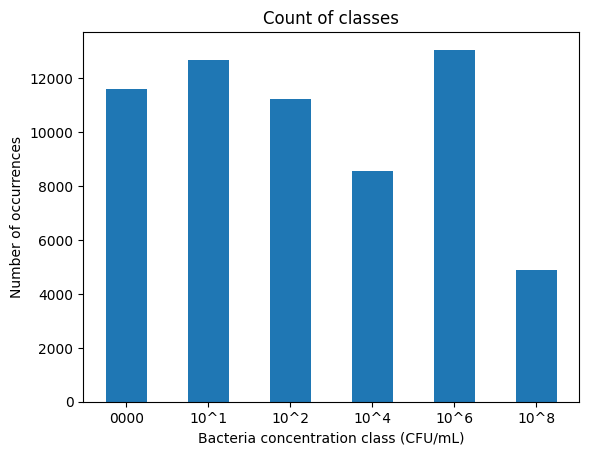

In [7]:
# Find CLASSES
# classes = df['class_target'].unique()
CLASSES = sorted(df['class_target'].unique())
CLASSES_SHORT = [class_.split(' CFU:mL')[0] for class_ in CLASSES]
print(f"Number of classes: {len(CLASSES)}")
print(f"Classes: {CLASSES}")

# Find number of samples per class
# classes_counts = df['class_target'].value_counts()
# print(classes_counts)
classes_counts = []
for c in CLASSES:
    class_count = len(df[df['class_target'] == c])
    classes_counts.append(class_count)
    print(f"Number of samples in class \"{c}\": {class_count}")

# # Get distribution of gold concentration
import matplotlib.pyplot as plt

# Count the occurrences of value_target in each interval
# intervals = list(range(1, len(classes) + 1))
intervals = [class_name.strip(" CFU:mL") for class_name in CLASSES]
# Plot the histogram
plt.bar(intervals, classes_counts, width=0.5)

# Set the labels and title
plt.xlabel('Bacteria concentration class (CFU/mL)')
plt.ylabel('Number of occurrences')
plt.title('Count of classes')

# Show the plot
plt.show()

We analyze `value_target`

Max concentration: 1.521
Min concentration: 0.184
intervals: [0.184, 0.189348, 0.194696, 0.200044, 0.205392, 0.21073999999999998, 0.216088, 0.221436, 0.22678399999999999, 0.232132, 0.23748, 0.242828, 0.248176, 0.25352399999999997, 0.258872, 0.26422, 0.269568, 0.274916, 0.28026399999999996, 0.285612, 0.29096, 0.296308, 0.301656, 0.307004, 0.31235199999999996, 0.3177, 0.323048, 0.328396, 0.333744, 0.33909199999999995, 0.34443999999999997, 0.349788, 0.355136, 0.36048399999999997, 0.365832, 0.37117999999999995, 0.376528, 0.381876, 0.387224, 0.392572, 0.39791999999999994, 0.40326799999999996, 0.408616, 0.413964, 0.41931199999999996, 0.42466, 0.43000799999999995, 0.43535599999999997, 0.440704, 0.44605199999999995, 0.45139999999999997, 0.456748, 0.46209599999999995, 0.46744399999999997, 0.472792, 0.47813999999999995, 0.483488, 0.488836, 0.49418399999999996, 0.499532, 0.50488, 0.5102279999999999, 0.515576, 0.5209239999999999, 0.526272, 0.53162, 0.5369679999999999, 0.542316, 0.5476639999999999,

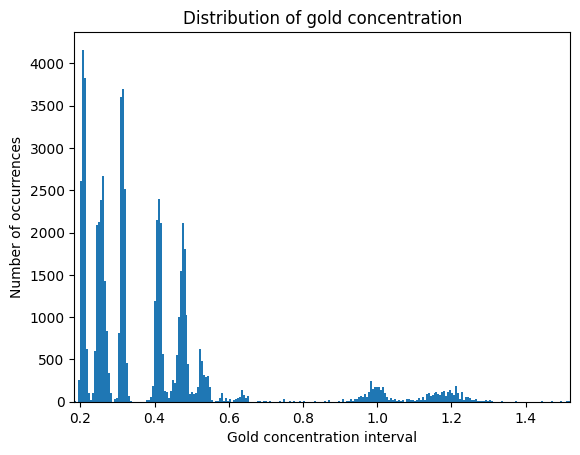

In [8]:
# Get distribution of gold concentration
import matplotlib.pyplot as plt

# Get the maximum and minimum values of value_target
max_value = df['value_target'].max()
min_value = df['value_target'].min()

print(f"Max concentration: {max_value}")
print(f"Min concentration: {min_value}")

# Calculate the step size
number_of_intervals = 250
step_size = (max_value - min_value) / number_of_intervals
intervals = [min_value + i * step_size for i in range(number_of_intervals + 1)]
print(f"intervals: {intervals}")

# Count the occurrences of value_target in each interval
value_counts, _, _ = plt.hist(df['value_target'], bins=intervals)

# Plot the histogram
plt.bar(intervals[:-1], value_counts, width=step_size, align='edge')

# Set the labels and title
plt.xlabel('Gold concentration interval')
plt.ylabel('Number of occurrences')
plt.title('Distribution of gold concentration')

# Adjust x-axis to start from 0
plt.xlim(min(intervals), max(intervals))

# Show the plot
plt.show()

We show the different classes in relation to the gold concentration

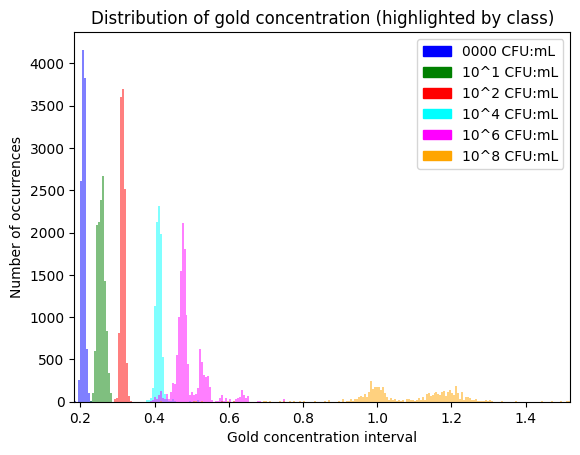

In [9]:
# Create a color map
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'black']
color_map = {CLASSES[i]: colors[i % len(colors)] for i in range(len(CLASSES))}

# Plot a histogram for each class
for class_ in CLASSES:
    df_class = df[df['class_target'] == class_]
    value_counts, _, _ = plt.hist(df_class['value_target'], bins=intervals, color=color_map[class_], alpha=0.5)

# Set the labels and title
plt.xlabel('Gold concentration interval')
plt.ylabel('Number of occurrences')
plt.title('Distribution of gold concentration (highlighted by class)')

# Adjust x-axis to start from 0
plt.xlim(min(intervals), max(intervals))

# Add a legend
plt.legend([plt.Rectangle((0,0),1,1, color=color_map[class_]) for class_ in CLASSES], CLASSES)

# Show the plot
plt.show()


# Features Analysis

Let's start by analyzing all teh features, in particular their dtypes. We also define manually the numeric and categorical features, fixing mistakes in the dataset.

In [10]:
# Print first record iterating on columns
print("First record:")
for col in df.columns:
    print(f"\t{col}: {df[col][0]}")

LABEL_COLUMNS = ["value_target", "class_target"]
FEATURES_COLUMNS = [col for col in df.columns if col not in LABEL_COLUMNS]
print(f"{FEATURES_COLUMNS = }")
GIVEN_NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_numeric_dtype(df[col])]
GIVEN_CATEGORICAL_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]
print(f"{GIVEN_NUMERIC_FEATURES = }")
print(f"{GIVEN_CATEGORICAL_FEATURES = }")

CATEGORICAL_FEATURES = [
    'well_plate_name',
    'wp_image_version',
    'well_name',
    'mock'
]

CATEGORICAL_FEATURES = [col for col in CATEGORICAL_FEATURES]
NUMERIC_FEATURES = [col for col in FEATURES_COLUMNS if col not in CATEGORICAL_FEATURES]
print(f"{NUMERIC_FEATURES = }")
print(f"{CATEGORICAL_FEATURES = }")

# Print difference between GIVEN_CATEGORICAL_FEATURES and CATEGORICAL_FEATURES
NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL = list(set(GIVEN_CATEGORICAL_FEATURES) - set(CATEGORICAL_FEATURES))
CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC = list(set(GIVEN_NUMERIC_FEATURES) - set(NUMERIC_FEATURES))
print(f"Features in GIVEN_CATEGORICAL_FEATURES and not in CATEGORICAL_FEATURES: {NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL}")
print(f"Features in CATEGORICAL_FEATURES and not in GIVEN_CATEGORICAL_FEATURES: {CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC}")

# Convert columns to right dtypes
df_converted = df.copy()
for col in NUMERIC_FEATURES_GIVEN_AS_CATEGORICAL:
    df_converted[col] = df_converted[col].astype('float64')

for col in CATEGORICAL_FEATURES_GIVEN_AS_NUMERIC:
    df_converted[col] = df_converted[col].astype('category')

# Print dtypes
print("Data types:")
for col, dtype in df_converted.dtypes.items():
    print(f"\t{col}: {dtype}")

First record:
	value_target: 1.158
	class_target: 10^8 CFU:mL
	well_plate_name: 05
	wp_image_version: 05_0
	wp_image_prop: 0.0
	well_name: A1
	mock: False
	FNumber: 1.7
	FocalLengthIn35mmFilm: 0.0
	ISOSpeedRatings: 226.0
	Orientation: 1.0
	ExposureTime: 0.020003
	FocalLength: 4.71
	Flash: 16.0
	MeteringMode: 2.0
	MaxApertureValue: 0.0
	ExposureBiasValue: 0.0
	BrightnessValue: 8.7
	ApertureValue: 1.53
	ShutterSpeedValue: 5.614
	full_gray_mean: 76.37894375857339
	full_gray_stddev: 42.19194116854811
	full_gray_mean_trm30: 89.51971710244321
	full_gray_skewness: -0.985075922379453
	full_gray_entropy: 4.823225765539228
	full_gray_entropy2: 3.3432053405876
	full_gray_entropy_glcm: 7.1244046874085125
	full_gray_mean_PIL: 76.37894375857339
	full_blue_mean: 66.73251028806584
	full_blue_stddev: 38.11588827465449
	full_blue_mean_trm30: 75.86755250750107
	full_blue_skewness: -0.7398326957511079
	full_blue_entropy: 4.923509474933315
	full_blue_entropy2: 3.4127167110102032
	full_blue_entropy_glcm: 7.

C:\Users\Fral0\AppData\Local\Temp\ipykernel_16900\2952855254.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  GIVEN_CATEGORICAL_FEATURES = [col for col in FEATURES_COLUMNS if pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col])]


Data types:
	value_target: float64
	class_target: object
	well_plate_name: object
	wp_image_version: object
	wp_image_prop: float64
	well_name: object
	mock: category
	FNumber: float64
	FocalLengthIn35mmFilm: float64
	ISOSpeedRatings: float64
	Orientation: float64
	ExposureTime: float64
	FocalLength: float64
	Flash: float64
	MeteringMode: float64
	MaxApertureValue: float64
	ExposureBiasValue: float64
	BrightnessValue: float64
	ApertureValue: float64
	ShutterSpeedValue: float64
	full_gray_mean: float64
	full_gray_stddev: float64
	full_gray_mean_trm30: float64
	full_gray_skewness: float64
	full_gray_entropy: float64
	full_gray_entropy2: float64
	full_gray_entropy_glcm: float64
	full_gray_mean_PIL: float64
	full_blue_mean: float64
	full_blue_stddev: float64
	full_blue_mean_trm30: float64
	full_blue_skewness: float64
	full_blue_entropy: float64
	full_blue_entropy2: float64
	full_blue_entropy_glcm: float64
	full_blue_mean_PIL: float64
	full_green_mean: float64
	full_green_stddev: float64
	f

We want to understand in particular what `wp_image_version` is. We print all occurrences of the well A1 in well plate 05 and all occurrences of well A2 in well plate 05. We discover that the following features are the same, if we fix the `wp_image_version`:
- FNumber
- FocalLengthIn35mmFilm
- ISOSpeedRatings
- Orientation
- ExposureTime
- FocalLength
- Flash
- MeteringMode
- MaxApertureValue
- ExposureBiasValue
- BrightnessValue
- ApertureValue
- ShutterSpeedValue

All the well plates have different starting string in `wp_image_version`, for example all the samples of for well plate 05 have a `wp_image_version` feature starting with `05_`, so samples from different well plates have always different `wp_image_version`.

Therefore we interpret `wp_image_version` as equivalent to the listed features, there's no bond with time, we think it represents all available photo settings together. We won't drop this `wp_image_version` feature even thought it should have very high correlation with the listed features all together (not one by one).

In [11]:
# Print all occurrences of the value 'A1' in the column 'well_name' and the value '05' in the column 'well_plate_name'
df_A1_05 = df_converted[(df_converted['well_name'] == 'A1') & (df_converted['well_plate_name'] == '05')]
number_of_A1_occurences = len(df_A1_05)
print(f"Number of occurrences of 'A1' in 'well_name' in well plate '05': {number_of_A1_occurences}")

for i in range(number_of_A1_occurences):
    print(f"Record {i}: - Image version: {df_A1_05['wp_image_version'].iloc[i]}")
    for col in df_A1_05.columns:
        print(f"\t{col}: {df_A1_05[col].iloc[i]}")

# Do the same for A2 in well plate 05
df_A2_05 = df_converted[(df_converted['well_name'] == 'A2') & (df_converted['well_plate_name'] == '05')]
number_of_A2_occurences = len(df_A2_05)
print(f"Number of occurrences of 'A2' in 'well_name' in well plate '05': {number_of_A2_occurences}")

for i in range(number_of_A2_occurences):
    print(f"Record {i}: - Image version: {df_A2_05['wp_image_version'].iloc[i]}")
    for col in df_A2_05.columns:
        print(f"\t{col}: {df_A2_05[col].iloc[i]}")

# Do the same for A1 in well plate 06
df_A1_06 = df_converted[(df_converted['well_name'] == 'A1') & (df_converted['well_plate_name'] == '06')]
number_of_A1_occurences = len(df_A1_06)
print(f"Number of occurrences of 'A1' in 'well_name' in well plate '06': {number_of_A1_occurences}")

for i in range(number_of_A1_occurences):
    print(f"Record {i}: - Image version: {df_A1_06['wp_image_version'].iloc[i]}")
    for col in df_A1_06.columns:
        print(f"\t{col}: {df_A1_06[col].iloc[i]}")

Number of occurrences of 'A1' in 'well_name' in well plate '05': 7
Record 0: - Image version: 05_0
	value_target: 1.158
	class_target: 10^8 CFU:mL
	well_plate_name: 05
	wp_image_version: 05_0
	wp_image_prop: 0.0
	well_name: A1
	mock: False
	FNumber: 1.7
	FocalLengthIn35mmFilm: 0.0
	ISOSpeedRatings: 226.0
	Orientation: 1.0
	ExposureTime: 0.020003
	FocalLength: 4.71
	Flash: 16.0
	MeteringMode: 2.0
	MaxApertureValue: 0.0
	ExposureBiasValue: 0.0
	BrightnessValue: 8.7
	ApertureValue: 1.53
	ShutterSpeedValue: 5.614
	full_gray_mean: 76.37894375857339
	full_gray_stddev: 42.19194116854811
	full_gray_mean_trm30: 89.51971710244321
	full_gray_skewness: -0.985075922379453
	full_gray_entropy: 4.823225765539228
	full_gray_entropy2: 3.3432053405876
	full_gray_entropy_glcm: 7.1244046874085125
	full_gray_mean_PIL: 76.37894375857339
	full_blue_mean: 66.73251028806584
	full_blue_stddev: 38.11588827465449
	full_blue_mean_trm30: 75.86755250750107
	full_blue_skewness: -0.7398326957511079
	full_blue_entropy: 

Now we analyze some features that had an unexpected dtype or unexpected values

In [15]:
# Print the unique values of the column "mock" and "Orientation"
check_unique_columns = ["mock", "Orientation", "wp_image_prop", "ExposureTime", "FocalLength", "MaxApertureValue", "ExposureBiasValue",	"BrightnessValue","ApertureValue", "ShutterSpeedValue"]
for col in check_unique_columns:
    print(f"Unique values of the column '{col}': {df_converted[col].unique()}")


Unique values of the column 'mock': [False]
Categories (1, bool): [False]
Unique values of the column 'Orientation': [1.]
Unique values of the column 'wp_image_prop': [0.]
Unique values of the column 'ExposureTime': [0.020003 0.010001 0.010002 0.005001 0.009971 0.00924  0.0091   0.00904
 0.008689 0.00988  0.00472  0.009412 0.009504 0.00956  0.009106 0.00944
 0.00962  0.009314 0.004985]
Unique values of the column 'FocalLength': [4.71]
Unique values of the column 'MaxApertureValue': [0.]
Unique values of the column 'ExposureBiasValue': [0.]
Unique values of the column 'BrightnessValue': [ 8.7  8.3  8.5  8.2  7.6  7.8  8.4  7.5  8.   7.9  8.1  8.6  7.7  8.8
  8.9  9.   9.2  9.1  9.4  9.3  7.3  7.4  9.8  9.5  9.6  9.9  9.7 10.6
 10.8 10.3 10.9 10.2 11.2 11.1 11.3 11.4 11.  10.7 10.5]
Unique values of the column 'ApertureValue': [1.53]
Unique values of the column 'ShutterSpeedValue': [5.614 6.629 7.636 6.643 6.754 6.768 6.781 6.845 6.658 7.721 6.727 6.714
 6.7   6.686 6.741 7.643]


We drop all columns that have a unique value, because they have no variance and they have no information value

In [12]:
# Drop all columns with only one unique value
df_dropped = df_converted.copy()
dropped_columns = {}
for col in df_converted.columns:
    unique_values = df_converted[col].unique()
    if len(unique_values) == 1:
        print(f"Dropping column '{col}' with unique value: {unique_values[0]}")
        dropped_columns[col] = unique_values[0]
        df_dropped = df_dropped.drop(columns=[col])
print(f"Dropped {len(dropped_columns)} columns with unique values:")
for col, value in dropped_columns.items():
    print(f"\t'{col}' with unique value: {value}")

NUMERIC_FEATURES = [col for col in NUMERIC_FEATURES if col in df_dropped.columns]
CATEGORICAL_FEATURES = [col for col in CATEGORICAL_FEATURES if col in df_dropped.columns]
print(f"{NUMERIC_FEATURES = }")
print(f"{CATEGORICAL_FEATURES = }")

Dropping column 'wp_image_prop' with unique value: 0.0
Dropping column 'mock' with unique value: False
Dropping column 'FNumber' with unique value: 1.7
Dropping column 'FocalLengthIn35mmFilm' with unique value: 0.0
Dropping column 'Orientation' with unique value: 1.0
Dropping column 'FocalLength' with unique value: 4.71
Dropping column 'Flash' with unique value: 16.0
Dropping column 'MeteringMode' with unique value: 2.0
Dropping column 'MaxApertureValue' with unique value: 0.0
Dropping column 'ExposureBiasValue' with unique value: 0.0
Dropping column 'ApertureValue' with unique value: 1.53
Dropped 11 columns with unique values:
	'wp_image_prop' with unique value: 0.0
	'mock' with unique value: False
	'FNumber' with unique value: 1.7
	'FocalLengthIn35mmFilm' with unique value: 0.0
	'Orientation' with unique value: 1.0
	'FocalLength' with unique value: 4.71
	'Flash' with unique value: 16.0
	'MeteringMode' with unique value: 2.0
	'MaxApertureValue' with unique value: 0.0
	'ExposureBiasVal

# Missing data analysis

We check the percentages of missing data for each feature and we conclude that we have no missing data

Total number of missing values: 0
Percentage of missing values per column:
value_target: 0.0%
class_target: 0.0%
well_plate_name: 0.0%
wp_image_version: 0.0%
wp_image_prop: 0.0%
well_name: 0.0%
mock: 0.0%
FNumber: 0.0%
FocalLengthIn35mmFilm: 0.0%
ISOSpeedRatings: 0.0%
Orientation: 0.0%
ExposureTime: 0.0%
FocalLength: 0.0%
Flash: 0.0%
MeteringMode: 0.0%
MaxApertureValue: 0.0%
ExposureBiasValue: 0.0%
BrightnessValue: 0.0%
ApertureValue: 0.0%
ShutterSpeedValue: 0.0%
full_gray_mean: 0.0%
full_gray_stddev: 0.0%
full_gray_mean_trm30: 0.0%
full_gray_skewness: 0.0%
full_gray_entropy: 0.0%
full_gray_entropy2: 0.0%
full_gray_entropy_glcm: 0.0%
full_gray_mean_PIL: 0.0%
full_blue_mean: 0.0%
full_blue_stddev: 0.0%
full_blue_mean_trm30: 0.0%
full_blue_skewness: 0.0%
full_blue_entropy: 0.0%
full_blue_entropy2: 0.0%
full_blue_entropy_glcm: 0.0%
full_blue_mean_PIL: 0.0%
full_green_mean: 0.0%
full_green_stddev: 0.0%
full_green_mean_trm30: 0.0%
full_green_skewness: 0.0%
full_green_entropy: 0.0%
full_gree

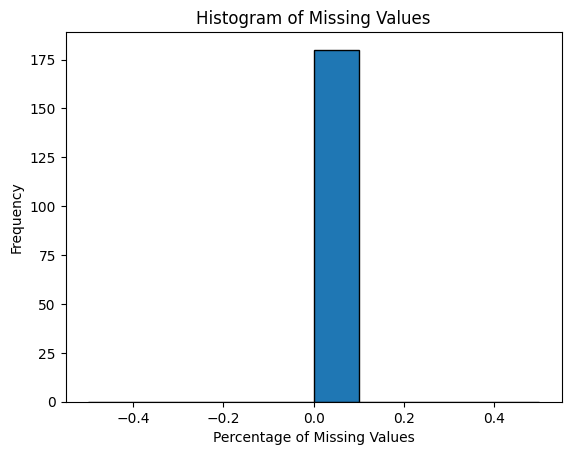

In [13]:
import numpy as np

print("Total number of missing values:", df.isnull().sum().sum())

print("Percentage of missing values per column:")
pct_missings = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    pct_missings.append(pct_missing)
    print(f'{col}: {pct_missing}%')

print(f"Mean percentage of missing values: {np.mean(pct_missings)}")

# Print the histogram of missing values using matplotlib
import matplotlib.pyplot as plt

# pct_missings = pct_missings + [0.1] * (100) + [0.05] * (100)  + [0.06] * (100)

fig, ax = plt.subplots()
ax.hist(pct_missings, bins=10, edgecolor='black')
ax.set_title('Histogram of Missing Values')
ax.set_xlabel('Percentage of Missing Values')
ax.set_ylabel('Frequency')
plt.show()

# Outlier Analysis

We check possible outliers in the dataset, using different visualizations

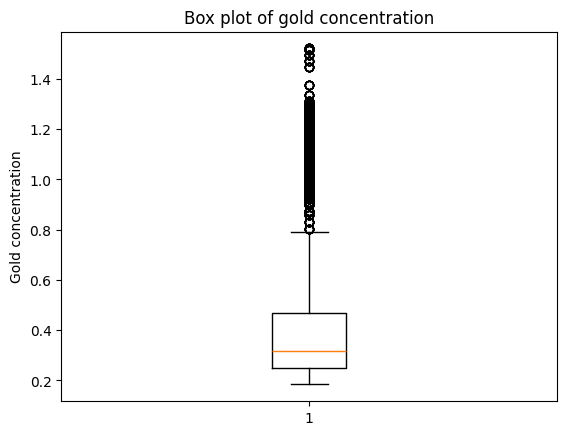

Number of outliers: 40


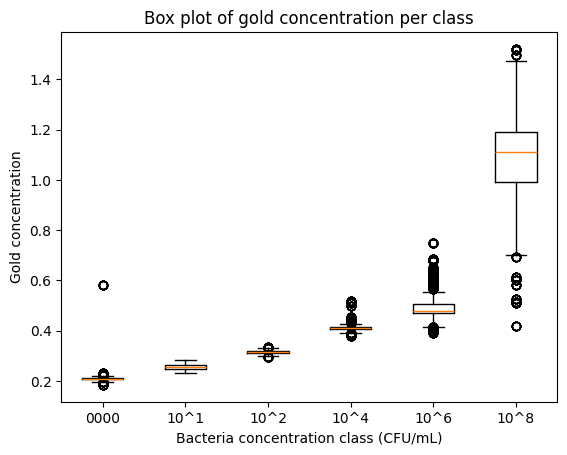

In [19]:
# Box plot of the gold concentration
import matplotlib.pyplot as plt

plt.boxplot(df['value_target'])
plt.title('Box plot of gold concentration')
plt.ylabel('Gold concentration')
plt.show()

# Count number of outliers
# # Count number of occurrences greater than 3 standard deviations from the mean
# mean = df['value_target'].mean()
# std = df['value_target'].std()
# outliers = df[(df['value_target'] > mean + 3 * std) | (df['value_target'] < mean - 3 * std)]
# print(f"Number of outliers: {len(outliers)}")

# Count number of occurrences greater than max_value or less than min_value
max_value = 1.4
min_value = 0.7

# outliers = df[(df['value_target'] > max_value) | (df['value_target'] < min_value)]
outliers = df[(df['value_target'] > max_value)]
print(f"Number of outliers: {len(outliers)}")

# Box plot of the gold concentration per class
import matplotlib.pyplot as plt

# Create a list of gold concentrations per class
class_values = []
for c in CLASSES:
    class_values.append(df[df['class_target'] == c]['value_target'])

# Create a box plot
plt.boxplot(class_values)
plt.title('Box plot of gold concentration per class')
plt.ylabel('Gold concentration')
plt.xlabel('Bacteria concentration class (CFU/mL)')
plt.xticks(range(1, len(CLASSES) + 1), CLASSES_SHORT)
plt.show()

# Feature selection

We convert categorical features with one-hot encoding

In [14]:
# Convert categorical features to one-hot encoding
df_onehot = pd.get_dummies(df_dropped, columns=CATEGORICAL_FEATURES)
# TEMP!
# df_onehot = df_onehot.iloc[:, :200]
FEATURES_COLUMNS = [col for col in df_onehot.columns if col not in LABEL_COLUMNS]
print(f"Feature columns number after one-hot encoding: {len(FEATURES_COLUMNS)}")

Feature columns number after one-hot encoding: 962


### Correlation calculations

We calculate Pearson correlation between features and we drop the features

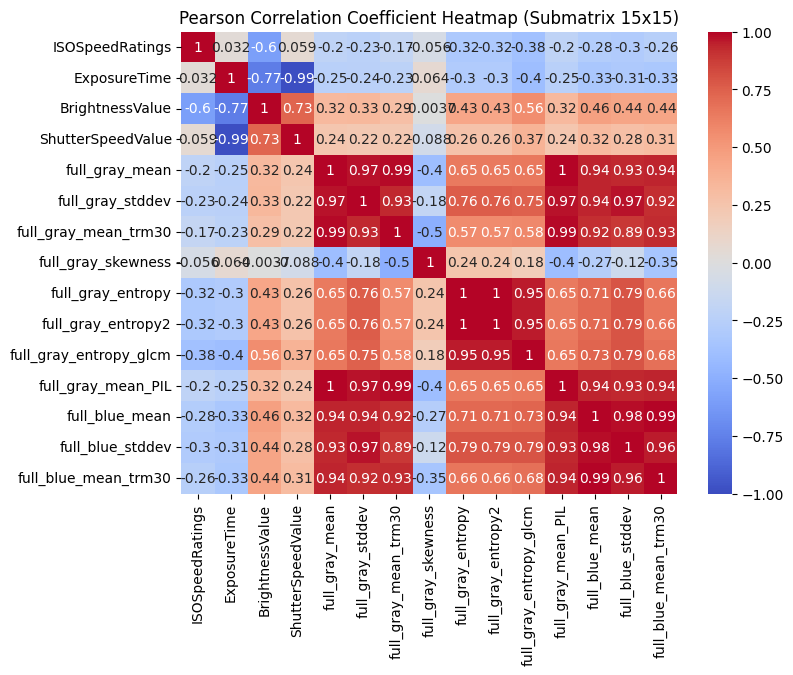

Dropped 148 columns with correlation coefficient above 0.8: {'H_entropy', 'full_a_entropy_glcm', 'full_H_mean_trm30', 'red_mean_PIL', 'S_mean_PIL', 'full_red_mean_trm30', 'full_red_entropy2', 'full_a_mean_PIL', 'H_skewness', 'full_blue_mean_trm30', 'a_mean_trm30', 'full_L_entropy', 'gray_entropy2', 'L_mean_trm30', 'gray_mean_PIL', 'L_entropy2', 'S_entropy2', 'full_gray_mean_PIL', 'S_mean_trm30', 'full_red_mean_PIL', 'blue_mean_PIL', 'V_mean', 'full_H_stddev', 'b_mean_trm30', 'full_green_entropy_glcm', 'red_skewness', 'full_gray_entropy_glcm', 'gray_entropy', 'blue_mean_trm30', 'V_stddev', 'full_V_entropy_glcm', 'full_L_mean_trm30', 'V_entropy', 'V_entropy_glcm', 'full_L_stddev', 'full_gray_entropy2', 'green_mean_PIL', 'L_entropy_glcm', 'full_red_entropy_glcm', 'full_S_mean_PIL', 'green_mean', 'full_L_entropy_glcm', 'S_stddev', 'blue_entropy2', 'full_blue_entropy_glcm', 'b_mean', 'H_mean_trm30', 'full_red_entropy', 'gray_mean', 'red_stddev', 'S_mean', 'a_entropy2', 'full_green_mean', 'f

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation coefficient
SUBMATRIX_SIZE = 15
FEATURES_COLUMNS = [col for col in df_onehot.columns if col not in LABEL_COLUMNS]
correlation_matrix = df_onehot[FEATURES_COLUMNS].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.iloc[:SUBMATRIX_SIZE, :SUBMATRIX_SIZE], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Pearson Correlation Coefficient Heatmap (Submatrix {SUBMATRIX_SIZE}x{SUBMATRIX_SIZE})')
plt.show()

# Set the correlation threshold
threshold = 0.8

# Create a mask to identify columns to drop
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Drop the identified columns
df_onehot_dropped = df_onehot.drop(columns=to_drop)
print(f"Dropped {len(to_drop)} columns with correlation coefficient above {threshold}: {to_drop}")
print(f"Remaining columns: {df_onehot_dropped.columns}")

# Save df_onehot_dropped and correlation_matrix to pickle files
df_onehot_dropped.to_pickle('df_onehot_dropped.pkl')
correlation_matrix.to_pickle('correlation_matrix.pkl')

len(FEATURES_COLUMNS) = 814


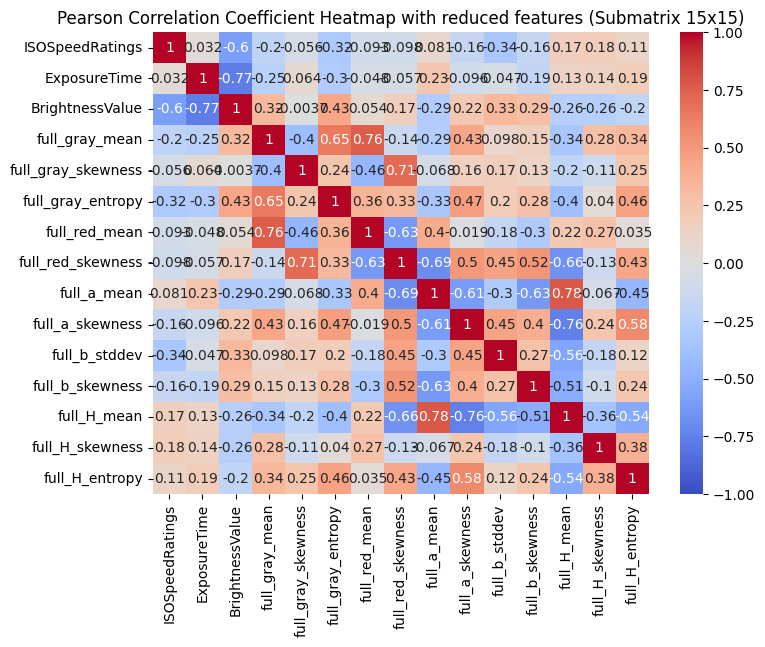

In [16]:
# Import df_onehot_dropped from a pickle file
import pandas as pd
import seaborn as sns

df_onehot_dropped = pd.read_pickle('df_onehot_dropped.pkl')
correlation_matrix = pd.read_pickle('correlation_matrix.pkl')

# Plot the heatmap of the remaining features
FEATURES_COLUMNS = [col for col in df_onehot_dropped.columns if col not in LABEL_COLUMNS]
print(f"{len(FEATURES_COLUMNS) = }")
SUBMATRIX_SIZE = 15
correlation_matrix_dropped = correlation_matrix[FEATURES_COLUMNS].loc[FEATURES_COLUMNS]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_dropped.iloc[:SUBMATRIX_SIZE, :SUBMATRIX_SIZE], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Pearson Correlation Coefficient Heatmap with reduced features (Submatrix {SUBMATRIX_SIZE}x{SUBMATRIX_SIZE})')
plt.show()

We calculate chi-squared correlation with the each feature with the label `class_target`, we drop the columns with a correlation below a threshold

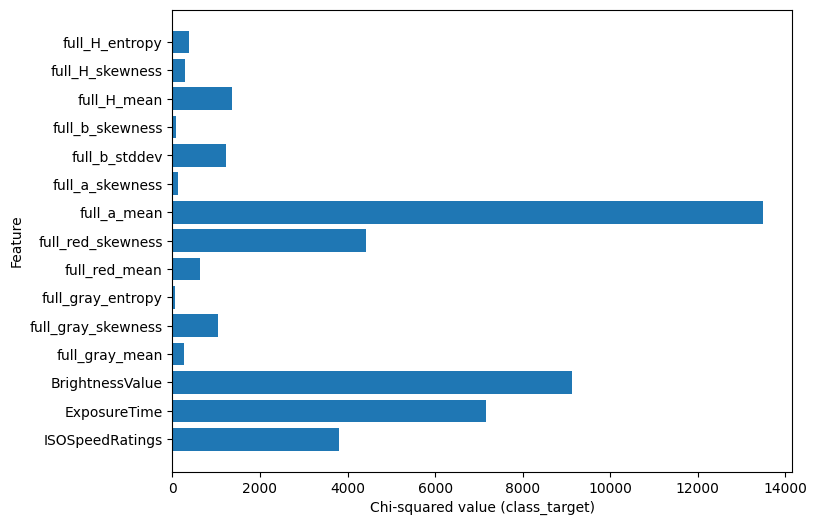

First 10 features sorted by ascending chi-squared value:
	('full_a_mean', 13486.414567685228)
	('well_plate_name_06', 11199.999999999905)
	('well_plate_name_07', 10079.999999999915)
	('well_plate_name_10', 10079.999999999915)
	('well_plate_name_16', 9720.000000001755)
	('BrightnessValue', 9118.996997025404)
	('well_plate_name_08', 8959.999999999925)
	('well_plate_name_09', 8959.999999999925)
	('well_plate_name_05', 7839.999999999935)
	('ExposureTime', 7153.816511352178)
Last 10 features sorted by ascending chi-squared value:
	('well_name_H9', 1.5225840531423265e-23)
	('well_name_H8', 1.5225840531423265e-23)
	('well_name_H7', 1.5225840531423265e-23)
	('well_name_H6', 1.5225840531423265e-23)
	('well_name_H5', 1.5225840531423265e-23)
	('well_name_H4', 1.5225840531423265e-23)
	('well_name_H3', 1.5225840531423265e-23)
	('well_name_H2', 1.5225840531423265e-23)
	('well_name_H12', 1.5225840531423265e-23)
	('well_name_H11', 1.5225840531423265e-23)
Kept 500 features, dropped 314 features


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Convert categorical target to numeric values
le = LabelEncoder()
y_class_target = le.fit_transform(df_onehot_dropped["class_target"])

# Select categorical features for chi-squared test
FEATURES_COLUMNS = [col for col in df_onehot_dropped.columns if col not in LABEL_COLUMNS]

# # Apply non-negative transformation (MinMaxScaler) to the input data because chi-squared test requires non-negative values
scaler = MinMaxScaler()
X_features = scaler.fit_transform(df_onehot_dropped[FEATURES_COLUMNS])

# Chi-squared test
chi2_values, p_values = chi2(X_features, y_class_target)

# Create a plot for the chi-squared values
NUMBER_OF_FEATURES_TO_PLOT = 15

plt.figure(figsize=(8, 6))
plt.barh(FEATURES_COLUMNS[:NUMBER_OF_FEATURES_TO_PLOT], chi2_values[:NUMBER_OF_FEATURES_TO_PLOT])
plt.xlabel('Chi-squared value (class_target)')
plt.ylabel('Feature')
le = LabelEncoder()
y = le.fit_transform(df_onehot_dropped["class_target"])
plt.show()

# # Drop columns with chi-squared value below a threshold
# threshold = 0.1
# to_drop = [col for col, chi2_val in zip(FEATURES_COLUMNS, chi2_values) if chi2_val < threshold]
# df_onehot_dropped_chi2 = df_onehot_dropped.drop(columns=to_drop)
# print(f"Dropped {len(to_drop)} columns with chi-squared value below {threshold}: {to_drop}")

# Sort features by chi-squared value using sorted
feature_columns_with_chi_squared_value = sorted(zip(FEATURES_COLUMNS, chi2_values), key=lambda x: x[1], reverse=True)
FEATURES_COLUMNS = [col for col, chi2_val in feature_columns_with_chi_squared_value]

# First 10 features
print(f"First 10 features sorted by ascending chi-squared value:")
for i in range(10):
    print(f"\t{feature_columns_with_chi_squared_value[i]}")

# Last 10 features
print(f"Last 10 features sorted by ascending chi-squared value:")
for i in range(10):
    print(f"\t{feature_columns_with_chi_squared_value[-i - 1]}")

# Keep only the top features
NUMBER_OF_FEATURES_TO_KEEP = 500
number_of_dropped_features = len(FEATURES_COLUMNS) - NUMBER_OF_FEATURES_TO_KEEP
FEATURES_COLUMNS = FEATURES_COLUMNS[:NUMBER_OF_FEATURES_TO_KEEP]
df_onehot_dropped_chi2 = df_onehot_dropped[FEATURES_COLUMNS + LABEL_COLUMNS]
print(f"Kept {NUMBER_OF_FEATURES_TO_KEEP} features, dropped {number_of_dropped_features} features")

# Save df_onehot_dropped_chi2 to a pickle file
df_onehot_dropped_chi2.to_pickle('df_onehot_dropped_chi2.pkl')


In [17]:
# Import df_onehot_dropped_chi2 from a pickle file
df_onehot_dropped_chi2 = pd.read_pickle('df_onehot_dropped_chi2.pkl')

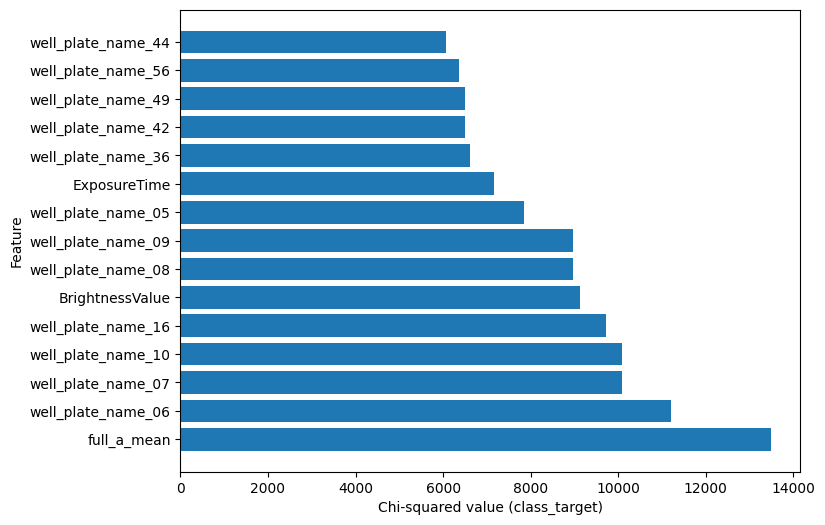

In [21]:
# Create a new plot for the Chi-squared values
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

FEATURES_COLUMNS = [col for col in df_onehot_dropped_chi2.columns if col not in LABEL_COLUMNS]
scaler = MinMaxScaler()
le = LabelEncoder()
X_features = scaler.fit_transform(df_onehot_dropped_chi2[FEATURES_COLUMNS])
y_class_target = le.fit_transform(df_onehot_dropped_chi2["class_target"])
chi2_values, _ = chi2(X_features, y_class_target)
plt.figure(figsize=(8, 6))
NUMBER_OF_FEATURES_TO_PLOT = 15
plt.barh(FEATURES_COLUMNS[:NUMBER_OF_FEATURES_TO_PLOT], chi2_values[:NUMBER_OF_FEATURES_TO_PLOT])
plt.xlabel('Chi-squared value (class_target)')
plt.ylabel('Feature')
plt.show()

# TODO - CHECK: understand why since value_target is continuous, it is not possible to apply chi-squared
# # Do the same for value_target (numeric feature)
# # Apply non-negative transformation to the input data
# scaler = MinMaxScaler()
# X = scaler.fit_transform(df_onehot_dropped_chi2[FEATURES_COLUMNS])
# y = df["value_target"]

# # Chi-squared test
# chi2_values, p_values = chi2(X, y)

# # Create a plot for the chi-squared values
# plt.figure(figsize=(8, 6))
# plt.barh(FEATURES_COLUMNS, chi2_values)
# plt.xlabel('Chi-squared value (value_target)')
# plt.ylabel('Feature')
# plt.show()

# # Drop columns with chi-squared value below a threshold
# threshold = 0.1
# to_drop = [col for col, chi2_val in zip(FEATURES_COLUMNS, chi2_values) if chi2_val < threshold]
# df_onehot_dropped_chi2 = df_onehot_dropped_chi2.drop(columns=to_drop)

# # Create a new plot for the Chi-squared values
# FEATURES_COLUMNS = [col for col in df_onehot_dropped_chi2.columns if col not in LABEL_COLUMNS]
# chi2_values, _ = chi2(X, y)
# plt.figure(figsize=(8, 6))
# plt.barh(FEATURES_COLUMNS, chi2_values)
# plt.xlabel('Chi-squared value (value_target)')
# plt.ylabel('Feature')
# plt.show()

We do feature importance, just to compare

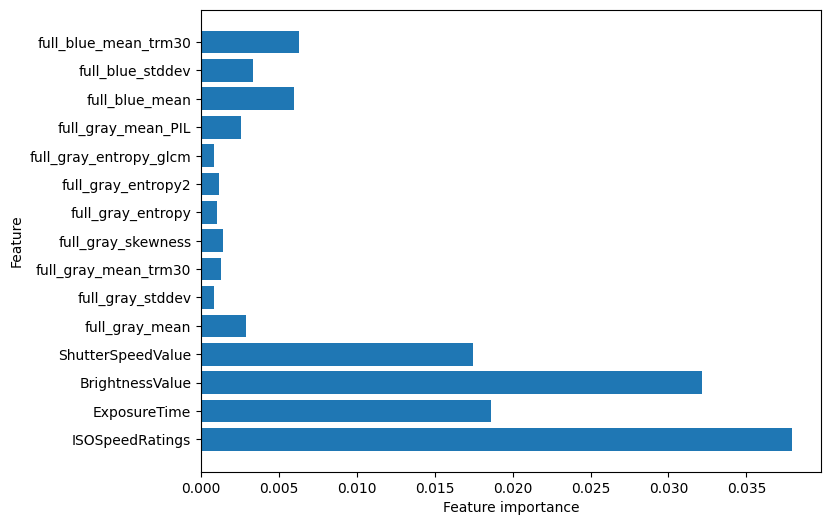

1. full_a_stddev: 0.05390570536624078
2. a_stddev: 0.039949126613336446
3. ISOSpeedRatings: 0.037898255891094405
4. BrightnessValue: 0.032179497134822946
5. full_S_stddev: 0.027650534489017907
6. full_b_mean: 0.023259954211389024
7. full_b_mean_trm30: 0.021327472890810023
8. S_entropy: 0.020425730434937964
9. S_stddev: 0.020193960533993263
10. ExposureTime: 0.01863412701536461
11. b_mean: 0.017807544938344664
12. ShutterSpeedValue: 0.01743342166566511
13. a_mean: 0.016881485750470434
14. S_entropy2: 0.016755661040740985
15. full_S_entropy2: 0.016610263900220378
16. full_b_mean_PIL: 0.016450464552193886
17. b_mean_PIL: 0.01626343449450546
18. H_mean_trm30: 0.015934720566031468
19. a_mean_trm30: 0.01560438817840519
20. a_entropy: 0.0147985625475602
21. full_a_entropy2: 0.014570174072764007
22. b_stddev: 0.014096225772916247
23. red_skewness: 0.014024718055593093
24. full_H_mean_trm30: 0.013975845983060797
25. full_b_stddev: 0.013744085673360528
26. a_mean_PIL: 0.01345686384823773
27. ful

In [26]:
# Do feature selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FEATURES_COLUMNS = [col for col in df_onehot.columns if col not in LABEL_COLUMNS]
X = df_onehot[FEATURES_COLUMNS]
y = le.fit_transform(df_onehot["class_target"])

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a plot for the feature importances
NUMBER_OF_FEATURES_TO_PLOT = 15
plt.figure(figsize=(8, 6))
plt.barh(FEATURES_COLUMNS[:NUMBER_OF_FEATURES_TO_PLOT], feature_importances[:NUMBER_OF_FEATURES_TO_PLOT])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# Sort features by importance using sorted and print them
feature_columns_with_importance = sorted(zip(FEATURES_COLUMNS, feature_importances), key=lambda x: x[1], reverse=True)
for i, (feature, importance) in enumerate(feature_columns_with_importance):
    print(f"{i + 1}. {feature}: {importance}")

# Dimentionality reduction

We perform a PCA. We tried many different number of components and we tried with different number of features selected with previous methods.

In [22]:
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Set the number of components
scaler = MinMaxScaler()
FEATURES_COLUMNS = [col for col in df_onehot_dropped_chi2.columns if col not in LABEL_COLUMNS]
X_features = scaler.fit_transform(df_onehot_dropped_chi2[FEATURES_COLUMNS])
n_components = min(200, len(FEATURES_COLUMNS))

# Create an instance of PCA with the desired number of components
print(f"Doing PCA with {n_components} components")
pca = PCA(n_components=n_components)

# Fit the PCA model to your data
pca.fit(X_features)

# Transform the data to the principal components
X_pca = pca.transform(X_features)

pickle.dump(X_pca, open('X_pca.pkl', 'wb'))

Doing PCA with 200 components


Explained variance ratio: [0.10443914 0.06270869 0.02859874 0.01948867 0.01861078 0.01258539
 0.01212338 0.01199419 0.01188492 0.01158472 0.01127113 0.01106526
 0.01090896 0.01086499 0.01065743 0.01049997 0.01048264 0.01030682
 0.01017859 0.01011363 0.01004414 0.00996989 0.00979248 0.00975223
 0.00974745 0.00969187 0.00960803 0.00936484 0.00916226 0.00907832
 0.0089801  0.00880711 0.00859664 0.00843225 0.00829    0.00825822
 0.00825105 0.0082498  0.00824809 0.0080131  0.00796055 0.00768343
 0.00752561 0.00750628 0.00750041 0.0073124  0.0071257  0.00703839
 0.00682097 0.00679775 0.00675789 0.00670158 0.00623829 0.00614957
 0.0061243  0.00603275 0.00547332 0.0031793  0.00204127 0.00149127
 0.00136003 0.00102009 0.00078713 0.00076177 0.00075516 0.00074977
 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977
 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977
 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977 0.00074977
 0.00074977 0.00074977 0.00074977 0.

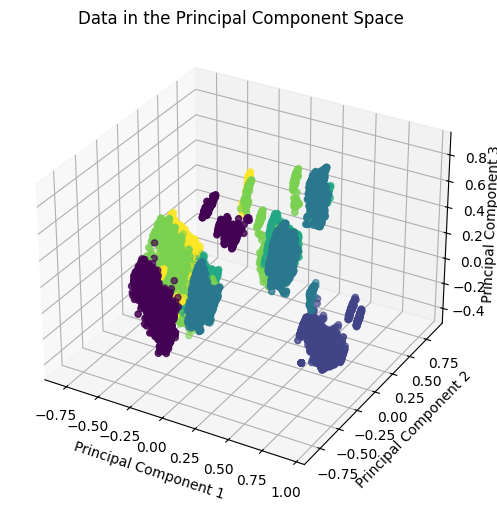

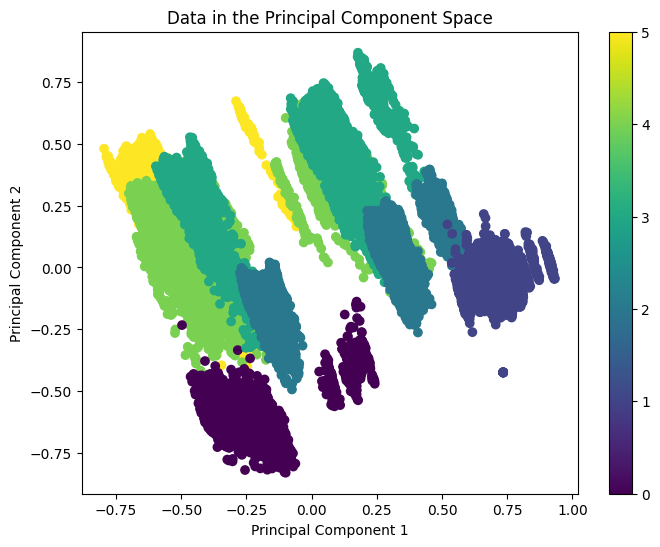

In [24]:
# Import X_pca from a pickle file
import pickle
X_pca = pickle.load(open('X_pca.pkl', 'rb'))
y = le.fit_transform(df_onehot["class_target"])

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")
print(f"Total explained variance ratio: {sum(explained_variance_ratio)}")

# # Plot the data in the principal component space
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA')
# plt.show()

# Plot the data in the principal component space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data in the Principal Component Space')
ax.zaxis.labelpad=-1        # Improve visibility of the z-axis label
plt.show()


# Plot the data in the principal component space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in the Principal Component Space')
plt.colorbar()


We perform a t-SNE on the PCA result. We apply PCA first because t-SNE is more computationally expensive.

In [23]:
# Apply t-SNE
from sklearn.manifold import TSNE

# Set the number of components
n_components = 2

# Create an instance of TSNE with the desired number of components
print(f"Doing t-SNE with {n_components} components")
tsne = TSNE(n_components=n_components)

# Fit the t-SNE model to your data
X_tsne = tsne.fit_transform(X_pca)

# Plot the data in the t-SNE space
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Data in the t-SNE Space')
plt.colorbar()
plt.show()

# Save X_tsne to a pickle file
import pickle

pickle.dump(X_tsne, open('X_tsne.pkl', 'wb'))

Doing t-SNE with 2 components


NameError: name 'y' is not defined

<Figure size 800x600 with 0 Axes>

c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Doing UMAP with 2 components


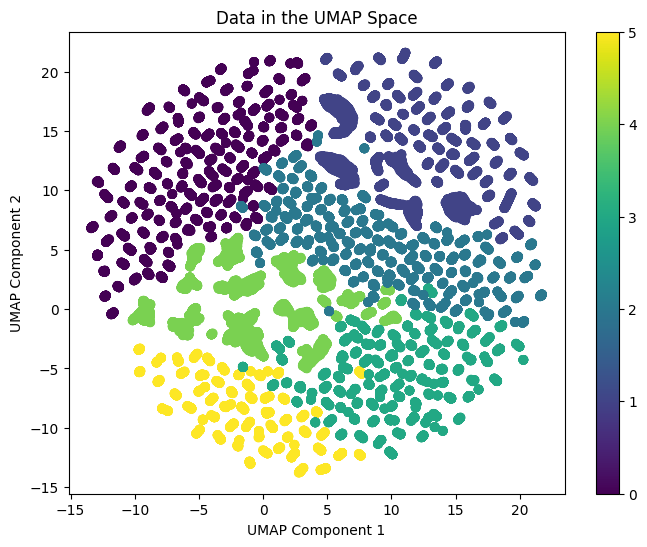

In [ ]:
# Apply UMAP
import umap

# Set the number of components
n_components = 2

# Create an instance of UMAP with the desired number of components
print(f"Doing UMAP with {n_components} components")

# Fit the UMAP model to your data
umap_model = umap.UMAP(n_components=n_components)
X_umap = umap_model.fit_transform(X_pca)

# Plot the data in the UMAP space
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('Data in the UMAP Space')
plt.colorbar()
plt.show()

# Save X_umap to a pickle file
import pickle

pickle.dump(X_umap, open('X_umap.pkl', 'wb'))

# Training - Classification

Let's define the train and test set.

In [63]:
import pickle

# Import Xs from a pickle files
X_pca = pickle.load(open('X_pca.pkl', 'rb'))
X_tsne = pickle.load(open('X_tsne.pkl', 'rb'))
X_umap = pickle.load(open('X_umap.pkl', 'rb'))

In [ ]:
# Split the data into training and testing sets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the dataset
le = LabelEncoder()
X = X_umap
y = le.fit_transform(df_onehot_dropped_chi2["class_target"])

# Set the test size
test_size = 0.2

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) # random_state set for reproducibility

# Print the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Print unique values of y_train and y_test
print()
print(f"Unique values of y_train: {np.unique(y_train)}")

# Print example of train and test data
print()
print("Example of train data:")
print(f"X_train[0]: {X_train[0]}")
print(f"y_train[0]: {y_train[0]}")

print()
print("Example of test data:")
print(f"X_test[0]: {X_test[0]}")
print(f"y_test[0]: {y_test[0]}")

# Save to pickle files
pickle.dump(X, open('X_classification.pkl', 'wb'))
pickle.dump(X_train, open('X_train_classification.pkl', 'wb'))
pickle.dump(X_test, open('X_test_classification.pkl', 'wb'))
pickle.dump(y, open('y_classification.pkl', 'wb'))
pickle.dump(y_train, open('y_train_classification.pkl', 'wb'))
pickle.dump(y_test, open('y_test_classification.pkl', 'wb'))


X_train shape: (49612, 2)
X_test shape: (12404, 2)
y_train shape: (49612,)
y_test shape: (12404,)

Unique values of y_train: [0 1 2 3 4 5]

Example of train data:
X_train[0]: [-12.039212    5.8466244]
y_train[0]: 0

Example of test data:
X_test[0]: [13.73706  13.444635]
y_test[0]: 1


We import the training and test data

In [26]:
# Import the training and test data from pickle files
import pickle

X = pickle.load(open('X_classification.pkl', 'rb'))
X_train = pickle.load(open('X_train_classification.pkl', 'rb'))
X_test = pickle.load(open('X_test_classification.pkl', 'rb'))
y = pickle.load(open('y_classification.pkl', 'rb'))
y_train = pickle.load(open('y_train_classification.pkl', 'rb'))
y_test = pickle.load(open('y_test_classification.pkl', 'rb'))

We apply Naive Bayes, that has the model performance that we want to beat.

Accuracy: 0.872299258303773
Scatter plot of the test data:


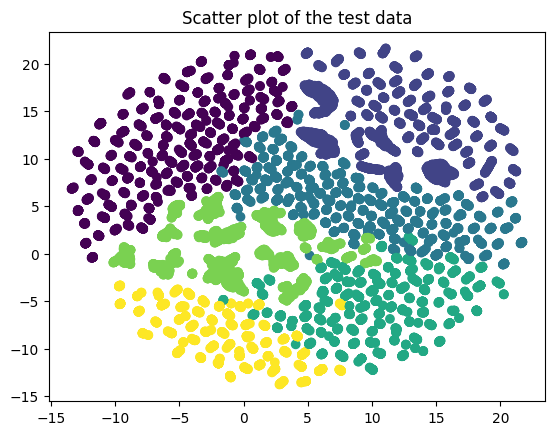

Confusion matrix:


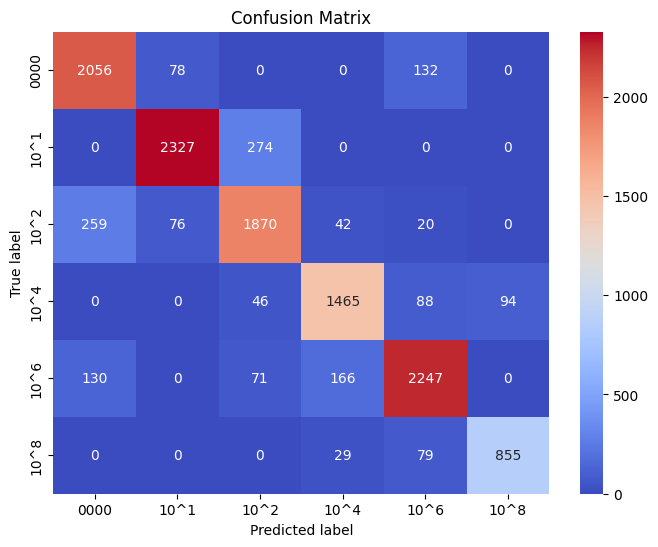

Classification Report:
              precision    recall  f1-score   support

        0000       0.84      0.91      0.87      2266
        10^1       0.94      0.89      0.92      2601
        10^2       0.83      0.82      0.83      2267
        10^4       0.86      0.87      0.86      1693
        10^6       0.88      0.86      0.87      2614
        10^8       0.90      0.89      0.89       963

    accuracy                           0.87     12404
   macro avg       0.87      0.87      0.87     12404
weighted avg       0.87      0.87      0.87     12404



In [32]:
# Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create an instance of the model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = nb.predict(X_test)

# Print the full classification report
print_full_classification_report(y_test, y_pred, X_test=X_test, target_names=CLASSES_SHORT)

We apply K-means

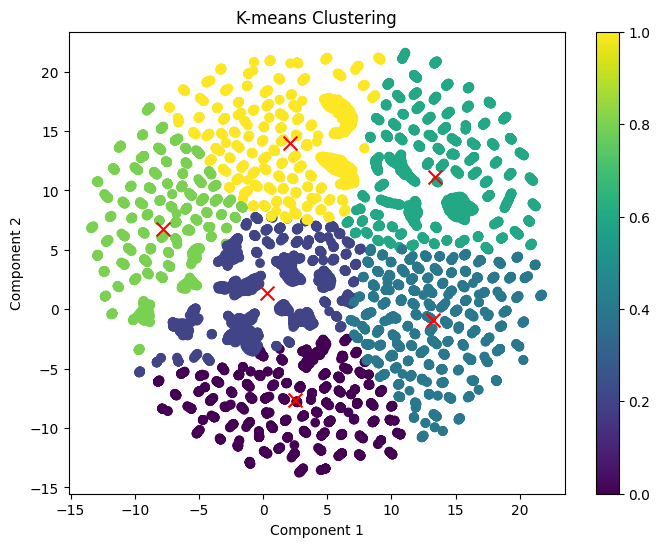

Accuracy: 0.10206385037084811
Silhouette score: 0.3346981406211853
Inertia: 1359264.375
Accuracy: 0.10206385037084811
Confusion matrix:


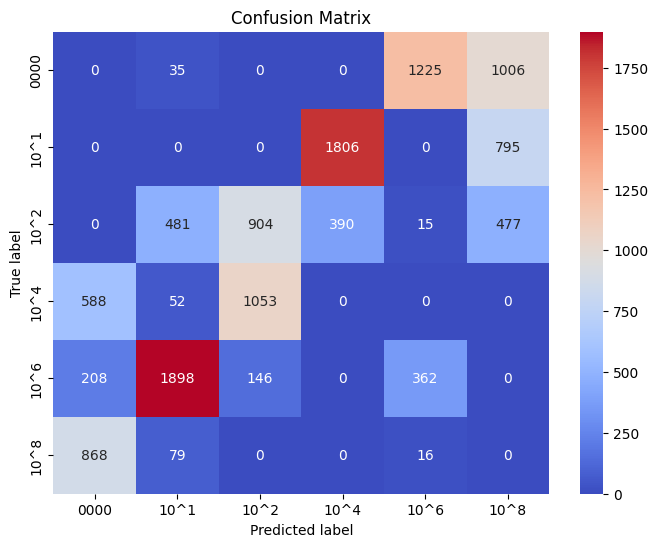

Classification Report:
              precision    recall  f1-score   support

        0000       0.00      0.00      0.00      2266
        10^1       0.00      0.00      0.00      2601
        10^2       0.43      0.40      0.41      2267
        10^4       0.00      0.00      0.00      1693
        10^6       0.22      0.14      0.17      2614
        10^8       0.00      0.00      0.00       963

    accuracy                           0.10     12404
   macro avg       0.11      0.09      0.10     12404
weighted avg       0.13      0.10      0.11     12404



In [56]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

np.random.seed(5)

# Set the number of clusters
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)

# Fit the K-means model to the data
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

# Get the cluster centers
centroids = kmeans.cluster_centers_

# Plot the data and the cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the silhouette score
silhouette = silhouette_score(X_test, y_pred)
print(f"Silhouette score: {silhouette}")

# Calculate the intertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Print the full classification report
print_full_classification_report(y_test, y_pred, target_names=CLASSES_SHORT)

We apply K-medoids

In [ ]:
# import numpy as np
# from sklearn_extra.cluster import KMedoids
# from sklearn.metrics import accuracy_score

# np.random.seed(5)

# # Set the number of clusters
# n_clusters = 6
# kmedoids = KMedoids(n_clusters=n_clusters)

# # Fit the K-means model to the data
# kmedoids.fit(X_train)
# y_pred = kmedoids.predict(X_test)

# # Get the cluster centers
# medoids = kmedoids.cluster_centers_

# # Plot the data and the cluster centers
# plt.figure(figsize=(8, 6))
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
# plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x', s=100)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('K-means Clustering')
# plt.colorbar()
# plt.show()

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

# # Calculate the silhouette score
# silhouette = silhouette_score(X_test, y_pred)
# print(f"Silhouette score: {silhouette}")

# # Calculate the intertia
# inertia = kmedoids.inertia_
# print(f"Inertia: {inertia}")

We apply SVM

Accuracy: 0.9516285069332473
Scatter plot of the test data:


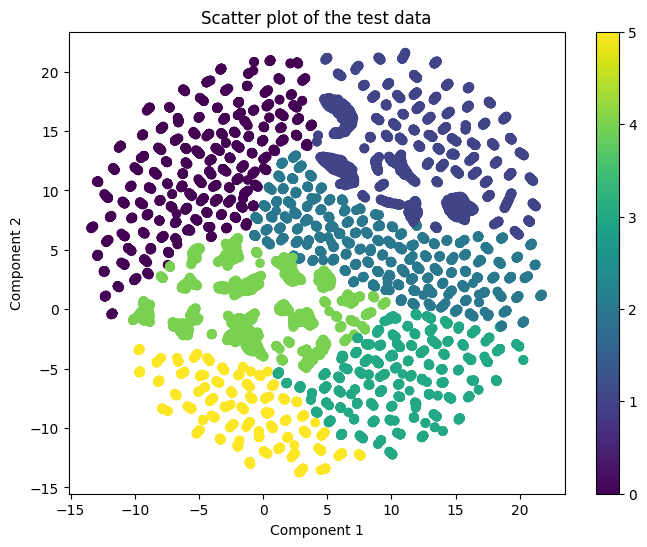

Confusion matrix:


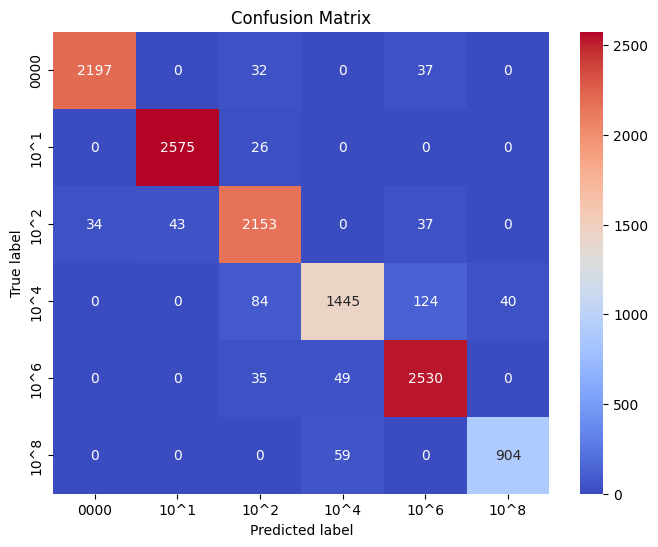

Classification Report:
              precision    recall  f1-score   support

        0000       0.98      0.97      0.98      2266
        10^1       0.98      0.99      0.99      2601
        10^2       0.92      0.95      0.94      2267
        10^4       0.93      0.85      0.89      1693
        10^6       0.93      0.97      0.95      2614
        10^8       0.96      0.94      0.95       963

    accuracy                           0.95     12404
   macro avg       0.95      0.94      0.95     12404
weighted avg       0.95      0.95      0.95     12404



In [52]:
# Apply SVM
from sklearn.svm import SVC

# Set the SVM model
svm = SVC()

# Fit the SVM model to the data
svm.fit(X_train, y_train)

# Predict the labels
y_pred = svm.predict(X_test)

# Print full classification report
print_full_classification_report(y_test, y_pred, X_test, target_names=CLASSES_SHORT)

We apply random forest

Accuracy: 0.9998387616897775
Scatter plot of the test data:


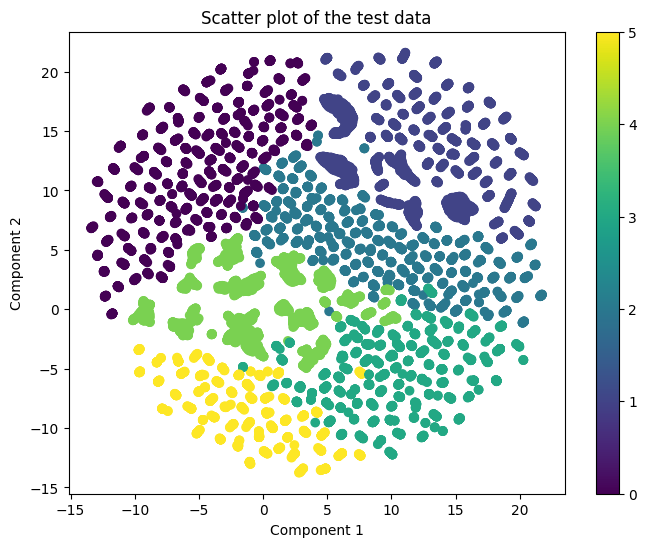

Confusion matrix:


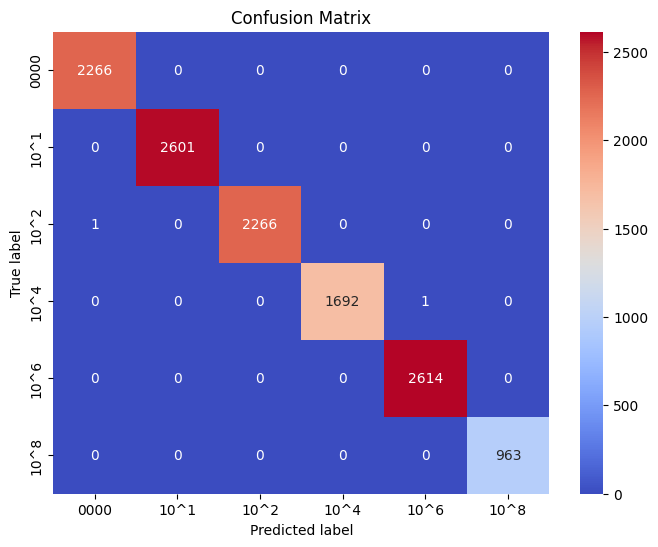

Classification Report:
              precision    recall  f1-score   support

        0000       1.00      1.00      1.00      2266
        10^1       1.00      1.00      1.00      2601
        10^2       1.00      1.00      1.00      2267
        10^4       1.00      1.00      1.00      1693
        10^6       1.00      1.00      1.00      2614
        10^8       1.00      1.00      1.00       963

    accuracy                           1.00     12404
   macro avg       1.00      1.00      1.00     12404
weighted avg       1.00      1.00      1.00     12404



In [58]:
# Train a classifier
from sklearn.ensemble import RandomForestClassifier

# Set the number of estimators
n_estimators = 10

# Create an instance of the classifier
clf = RandomForestClassifier(n_estimators=n_estimators)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Print full classification report
print_full_classification_report(y_test, y_pred, X_test, target_names=CLASSES_SHORT)

We apply XGBoost

Accuracy: 0.9976620445017736
Scatter plot of the test data:


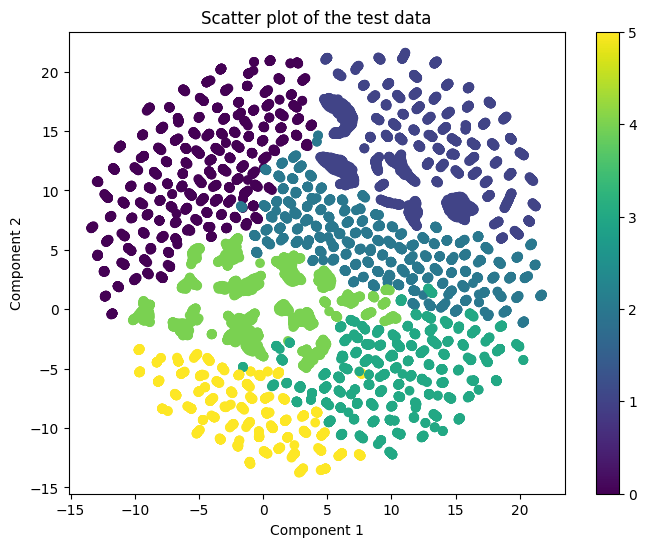

Confusion matrix:


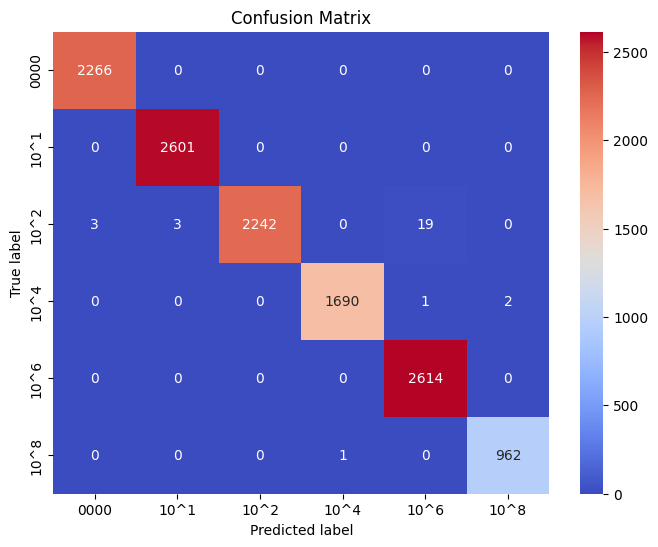

Classification Report:
              precision    recall  f1-score   support

        0000       1.00      1.00      1.00      2266
        10^1       1.00      1.00      1.00      2601
        10^2       1.00      0.99      0.99      2267
        10^4       1.00      1.00      1.00      1693
        10^6       0.99      1.00      1.00      2614
        10^8       1.00      1.00      1.00       963

    accuracy                           1.00     12404
   macro avg       1.00      1.00      1.00     12404
weighted avg       1.00      1.00      1.00     12404



In [59]:
# Apply XGBoost
import xgboost as xgb
from sklearn.metrics import silhouette_score

# Set the number of estimators
n_estimators = 10

# Create an instance of the classifier
clf = xgb.XGBClassifier(n_estimators=n_estimators)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Print full classification report
print_full_classification_report(y_test, y_pred, X_test, target_names=CLASSES_SHORT)

We apply hierarchical clustering

In [ ]:
# # Apply hierarchical clustering
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import accuracy_score, silhouette_score

# n_clusters = 6

# classifier = AgglomerativeClustering(n_clusters=n_clusters)
# classifier.fit(X_train)
# y_pred = classifier.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

# # Calculate the silhouette score
# silhouette = silhouette_score(X_test, y_pred)
# print(f"Silhouette score: {silhouette}")

# # Plot the data with predicted clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('Agglomerative Clustering')
# plt.colorbar()
# plt.show()

We apply KNN

Accuracy: 1.0
Scatter plot of the test data:


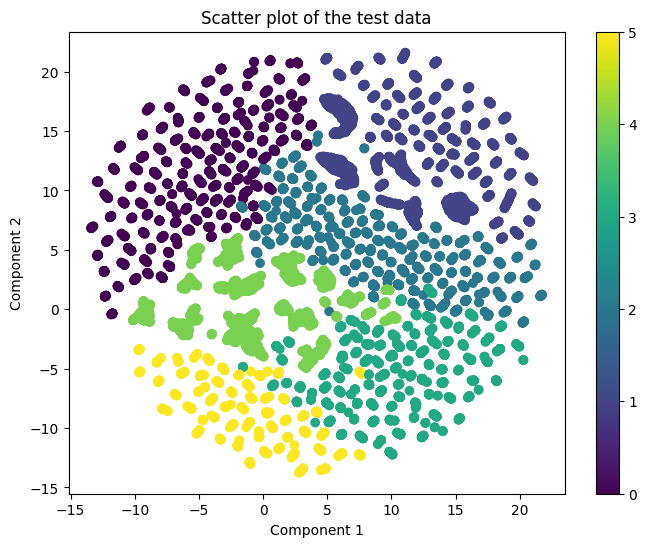

Confusion matrix:


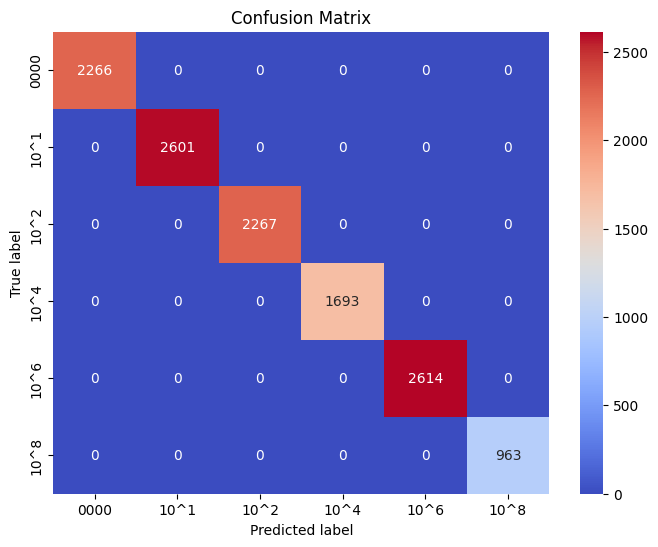

Classification Report:
              precision    recall  f1-score   support

        0000       1.00      1.00      1.00      2266
        10^1       1.00      1.00      1.00      2601
        10^2       1.00      1.00      1.00      2267
        10^4       1.00      1.00      1.00      1693
        10^6       1.00      1.00      1.00      2614
        10^8       1.00      1.00      1.00       963

    accuracy                           1.00     12404
   macro avg       1.00      1.00      1.00     12404
weighted avg       1.00      1.00      1.00     12404



In [60]:
# Apply KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set the number of neighbors
n_neighbors = 7

# Create an instance of the classifier
clf = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Print the full classification report
print_full_classification_report(y_test, y_pred, X_test, target_names=CLASSES_SHORT)

### Deep learning

In [ ]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from numpy.typing import NDArray
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Set train, test and validation data
X: NDArray[np.float64] = X_umap
y = pd.get_dummies(df_onehot_dropped_chi2["class_target"])
y = y.to_numpy(dtype=np.int32)
# y = y.to_numpy(dtype=np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X train example: {X_train[0]}\n")

print(f"X_valid shape: {X_valid.shape}")
print(f"X valid example: {X_valid[0]}\n")

print(f"X_test shape: {X_test.shape}")
print(f"X test example: {X_test[0]}\n")

print(f"y_train shape: {y_train.shape}")
print(f"y_train example: {y_train[0]}\n")

print(f"y_valid shape: {y_valid.shape}")
print(f"y_valid example: {y_valid[0]}\n")

print(f"y_test shape: {y_test.shape}")
print(f"y_test example: {y_test[0]}\n")

X_train shape: (39689, 2)
X train example: [-6.71389   -1.5340284]

X_valid shape: (9923, 2)
X valid example: [-11.563921  11.736892]

X_test shape: (12404, 2)
X test example: [13.73706  13.444635]

y_train shape: (39689, 6)
y_train example: [0 0 0 0 1 0]

y_valid shape: (9923, 6)
y_valid example: [1 0 0 0 0 0]

y_test shape: (12404, 6)
y_test example: [0 1 0 0 0 0]



In [66]:
import tensorflow as tf

reg = tf.keras.regularizers.l2(0.0001)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(5, activation='relu', input_shape=(X_train.shape[-1],), kernel_regularizer=reg),
        tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=reg),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ]
)

optimizer = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy', 'mae', 'mse'])

model.summary()


c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=126, verbose=1)

# Save the model and history to a file
model.save('model.keras')
pickle.dump(history.history, open('history.pkl', 'wb'))

Epoch 1/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9365 - loss: 0.1620 - mae: 0.0328 - mse: 0.0147 - val_accuracy: 0.9346 - val_loss: 0.1595 - val_mae: 0.0325 - val_mse: 0.0148
Epoch 2/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9354 - loss: 0.1606 - mae: 0.0325 - mse: 0.0148 - val_accuracy: 0.9409 - val_loss: 0.1563 - val_mae: 0.0318 - val_mse: 0.0144
Epoch 3/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9367 - loss: 0.1595 - mae: 0.0319 - mse: 0.0146 - val_accuracy: 0.9399 - val_loss: 0.1545 - val_mae: 0.0314 - val_mse: 0.0143
Epoch 4/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9380 - loss: 0.1559 - mae: 0.0314 - mse: 0.0144 - val_accuracy: 0.9359 - val_loss: 0.1519 - val_mae: 0.0312 - val_mse: 0.0143
Epoch 5/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9388 - loss: 0.1543 - mae: 0.0308 - mse: 0.0143 - val_accuracy: 0.9336 - val_loss: 0.1509 - val_mae: 0.0307 - val_mse: 0.0141
Epoch 6/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 

In [73]:
# Import the model and history from a file
import pickle
import tensorflow as tf

model = tf.keras.models.load_model('model.keras')
history = pickle.load(open('history.pkl', 'rb'))

c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


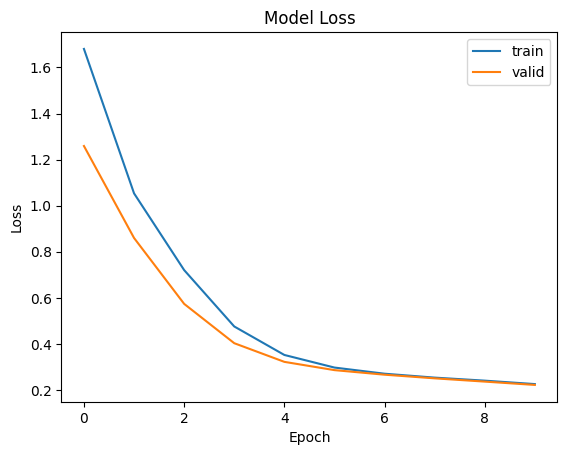

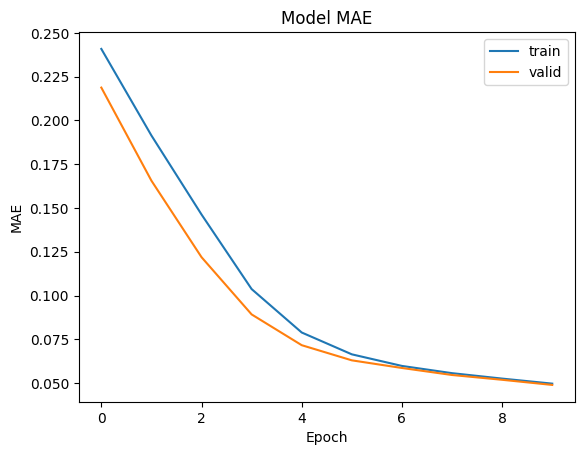

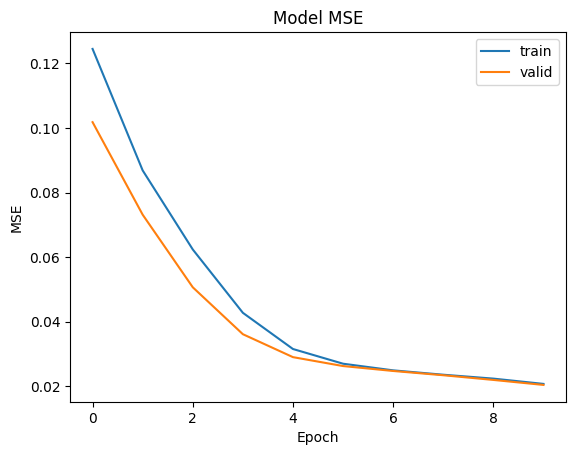

In [68]:
create_training_history_plot(history)

388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.9459 - loss: 0.1390 - mae: 0.0276 - mse: 0.0124
Loss: 0.13840584456920624
Accuracy: 0.9446146488189697
Mean Absolute Error: 0.027906114235520363
Mean Squared Error: 0.012666904367506504
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
First 10 predictions: [1 0 2 4 4 3 2 1 5 1]
Accuracy: 0.9446146404385682
Scatter plot of the test data:


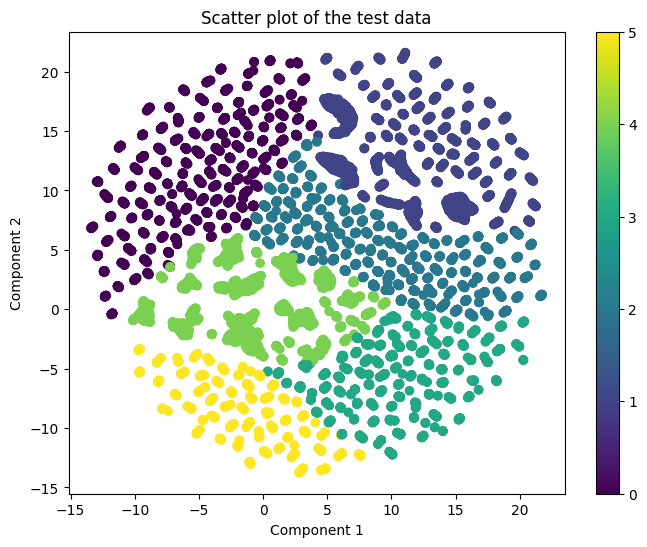

Confusion matrix:


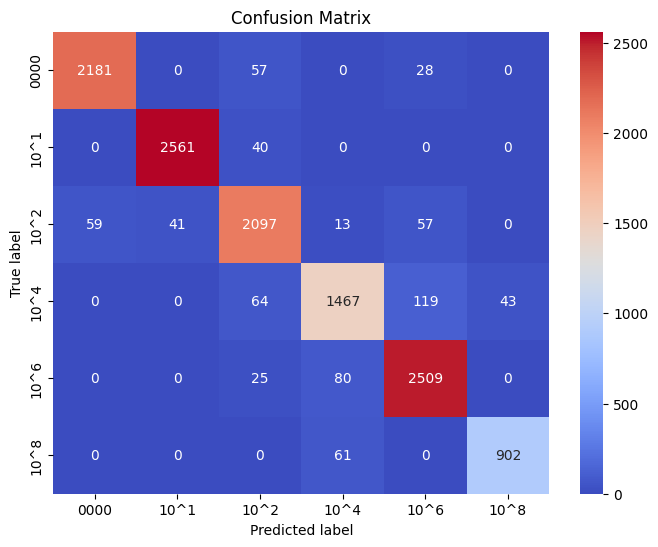

Classification Report:
              precision    recall  f1-score   support

        0000       0.97      0.96      0.97      2266
        10^1       0.98      0.98      0.98      2601
        10^2       0.92      0.93      0.92      2267
        10^4       0.90      0.87      0.89      1693
        10^6       0.92      0.96      0.94      2614
        10^8       0.95      0.94      0.95       963

    accuracy                           0.94     12404
   macro avg       0.94      0.94      0.94     12404
weighted avg       0.94      0.94      0.94     12404



In [75]:
# Evaluate the model
loss, accuracy, mae, mse = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predict the test data
y_pred = model.predict(X_test)

# Print accuracy
y_pred_1d = np.argmax(y_pred, axis=1)
y_test_1d = np.argmax(y_test, axis=1)

print(f"First 10 predictions: {y_pred_1d[:10]}")

# Print full classification report
print_full_classification_report(y_test_1d, y_pred_1d, X_test, target_names=CLASSES_SHORT)

## Regression

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the dataset
X = X_umap
y = df_onehot_dropped_chi2["value_target"].to_numpy()

# Set the test size
test_size = 0.2

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X train example: {X_train[0]}\n")

print(f"X_valid shape: {X_valid.shape}")
print(f"X valid example: {X_valid[0]}\n")

print(f"X_test shape: {X_test.shape}")
print(f"X test example: {X_test[0]}\n")

print(f"y_train shape: {y_train.shape}")
print(f"y_train example: {y_train[0]}\n")

print(f"y_valid shape: {y_valid.shape}")
print(f"y_valid example: {y_valid[0]}\n")

print(f"y_test shape: {y_test.shape}")
print(f"y_test example: {y_test[0]}\n")

# Save to pickle files
pickle.dump(X, open('X_regression.pkl', 'wb'))
pickle.dump(X_train, open('X_train_regression.pkl', 'wb'))
pickle.dump(X_test, open('X_test_regression.pkl', 'wb'))
pickle.dump(y, open('y_regression.pkl', 'wb'))
pickle.dump(y_train, open('y_train_regression.pkl', 'wb'))
pickle.dump(y_test, open('y_test_regression.pkl', 'wb'))

X_train shape: (39689, 2)
X train example: [-6.71389   -1.5340284]

X_valid shape: (9923, 2)
X valid example: [-11.563921  11.736892]

X_test shape: (12404, 2)
X test example: [13.73706  13.444635]

y_train shape: (39689,)
y_train example: 0.579

y_valid shape: (9923,)
y_valid example: 0.202

y_test shape: (12404,)
y_test example: 0.275



We use the mean of the target value as baseline model

In [ ]:
import numpy as np

# Calculate the mean of the target variable in the training set
mean_train = np.mean(y_train)

# Predict the mean for all instances in the test set
y_pred = np.full_like(y_test, mean_train)

print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.1535334156129856
Mean squared error: 0.052199968142568894
Mean relative error: 0.416373844122698


We use Linear Regression

In [ ]:
# Do regression using Linear Regression
from sklearn.linear_model import LinearRegression

# Set the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.10849352245652187
Mean squared error: 0.02546011924915127
Mean relative error: 0.28943534531048287


We use Random Forest Regressor

In [ ]:
# Do regression using Random Forest
from sklearn.ensemble import RandomForestRegressor

# Set the model
model = RandomForestRegressor(n_estimators=50)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.012009833924540468
Mean squared error: 0.0011142769905514356
Mean relative error: 0.02458316813757514


We use XGBoost

In [ ]:
# Do regression using XGBoost
import xgboost as xgb

# Set the model
model = xgb.XGBRegressor(n_estimators=50)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.012600897466509777
Mean squared error: 0.0010036622232525766
Mean relative error: 0.0270814708603779


We use KNN Regressor

In [ ]:
# Do regression using KNN
from sklearn.neighbors import KNeighborsRegressor

# Set the model
model = KNeighborsRegressor(n_neighbors=7)

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.011421488459943799
Mean squared error: 0.0010279549404734484
Mean relative error: 0.023292305205487376


We use SVR (Support Vector Regressor)

In [ ]:
# Do regression using SVR
from sklearn.svm import SVR

# Set the model
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

Mean absolute error: 0.06581124650981701
Mean squared error: 0.009334412507278896
Mean relative error: 0.1762294031345817


### Deep learning

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the dataset
X = X_pca
y = df_onehot_dropped_chi2["value_target"].to_numpy()

# Set the test size
test_size = 0.2

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X train example: {X_train[0]}\n")

print(f"X_valid shape: {X_valid.shape}")
print(f"X valid example: {X_valid[0]}\n")

print(f"X_test shape: {X_test.shape}")
print(f"X test example: {X_test[0]}\n")

print(f"y_train shape: {y_train.shape}")
print(f"y_train example: {y_train[0]}\n")

print(f"y_valid shape: {y_valid.shape}")
print(f"y_valid example: {y_valid[0]}\n")

print(f"y_test shape: {y_test.shape}")
print(f"y_test example: {y_test[0]}\n")

X_train shape: (39689, 200)
X train example: [-4.10562783e-01  8.35452897e-02 -2.22617079e-01 -1.91889579e-01
  1.93302576e-02 -1.11032093e-02 -4.66287803e-02  5.09833464e-03
  7.10722446e-02 -1.13764018e-02 -2.22830328e-02 -5.69197456e-02
 -2.40847117e-02  4.58928075e-02  4.34919338e-02  3.03173178e-03
 -9.81529734e-03  8.89056405e-04 -1.32732462e-02 -7.53436045e-02
  2.24893610e-02 -1.03565820e-01  3.79054438e-04 -2.21807312e-03
  1.03863563e-04 -3.51621594e-02 -2.82020810e-02  7.87934932e-02
 -1.23943333e-02  2.17656874e-01  1.10964044e-01 -1.14674404e-01
  4.48255852e-01 -2.24175320e-01 -4.74760267e-03 -1.88457522e-01
  3.01122188e-01 -2.09781508e-01  6.08412266e-01  1.08883954e-01
  7.40081010e-02 -1.39992244e-01  6.57086602e-02  1.51479213e-03
  1.32025003e-02  9.48505991e-02  9.27124077e-02 -4.31829739e-02
 -4.97103939e-02 -2.30485518e-02  4.53232853e-03 -2.82459180e-02
 -2.32657276e-02 -4.22037942e-02 -7.20305493e-03 -4.55787556e-03
 -9.99530125e-02 -8.77372552e-02  4.61553461e

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale X
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Scale y
scaler.fit(y.reshape(-1, 1))

y_train_scaled = scaler.transform(y_train.reshape(-1, 1))
y_valid_scaled = scaler.transform(y_valid.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [ ]:
import tensorflow as tf

reg = tf.keras.regularizers.l2(0.0001)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(5, activation='relu', input_shape=(X_train.shape[-1],), kernel_regularizer=reg),
        tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=reg),
        tf.keras.layers.Dense(1, activation='linear')
    ]
)

model_scaled = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(5, activation='relu', input_shape=(X_train_scaled.shape[-1],), kernel_regularizer=reg),
        tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=reg),
        tf.keras.layers.Dense(1, activation='linear')
    ]
)

optimizer = tf.keras.optimizers.Adam()
optimizer_scaled = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.MeanSquaredError()
loss_function_scaled = tf.keras.losses.MeanSquaredError()

model.compile(loss=loss_function, optimizer=optimizer, metrics=['mae', 'mse'])
model_scaled.compile(loss=loss_function_scaled, optimizer=optimizer_scaled, metrics=['mae', 'mse'])

model.summary()
model_scaled.summary()

c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │         1,005 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041 (4.07 KB)

 Trainable params: 1,041 (4.07 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 5)              │         1,005 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,041 (4.07 KB)

 Trainable params: 1,041 (4.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=264, verbose=1)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1620 - mae: 0.3223 - mse: 0.1606 - val_loss: 0.0320 - val_mae: 0.1143 - val_mse: 0.0307
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0215 - mae: 0.0971 - mse: 0.0202 - val_loss: 0.0060 - val_mae: 0.0479 - val_mse: 0.0047
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - mae: 0.0414 - mse: 0.0036 - val_loss: 0.0034 - val_mae: 0.0313 - val_mse: 0.0023
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - mae: 0.0283 - mse: 0.0020 - val_loss: 0.0028 - val_mae: 0.0257 - val_mse: 0.0018
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - mae: 0.0242 - mse: 0.0016 - val_loss: 0.0025 - val_mae: 0.0236 - val_mse: 0.0016
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - mae: 0.0225 - mse: 0.0015 - val_loss: 0.0023 - val_mae: 0.0224 - val_mse: 0.0015
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - mae: 0.0215 - mse: 0.0014 - val

In [ ]:
history_scaled = model_scaled.fit(X_train_scaled, y_train_scaled, validation_data=(X_valid_scaled, y_valid_scaled), epochs=10, batch_size=264, verbose=1)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2761 - mae: 0.8170 - mse: 1.2746 - val_loss: 0.5124 - val_mae: 0.4500 - val_mse: 0.5110
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3705 - mae: 0.3767 - mse: 0.3690 - val_loss: 0.1075 - val_mae: 0.2080 - val_mse: 0.1059
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0805 - mae: 0.1813 - mse: 0.0789 - val_loss: 0.0488 - val_mae: 0.1386 - val_mse: 0.0472
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0423 - mae: 0.1268 - mse: 0.0406 - val_loss: 0.0390 - val_mae: 0.1168 - val_mse: 0.0373
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0377 - mae: 0.1116 - mse: 0.0361 - val_loss: 0.0344 - val_mae: 0.1051 - val_mse: 0.0327
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0314 - mae: 0.0985 - mse: 0.0297 - val_loss: 0.0319 - val_mae: 0.0973 - val_mse: 0.0303
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297 - mae: 0.0913 - mse: 0.0281 - val

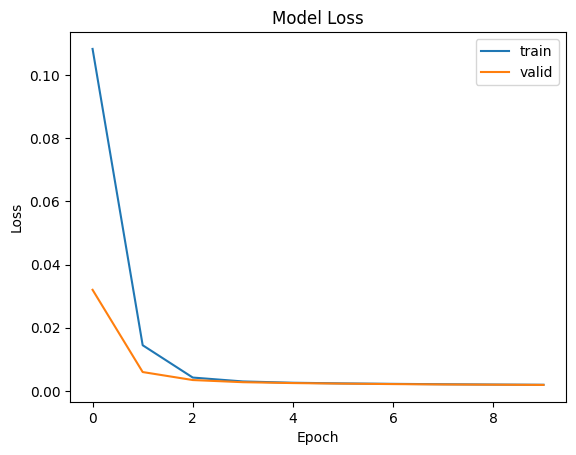

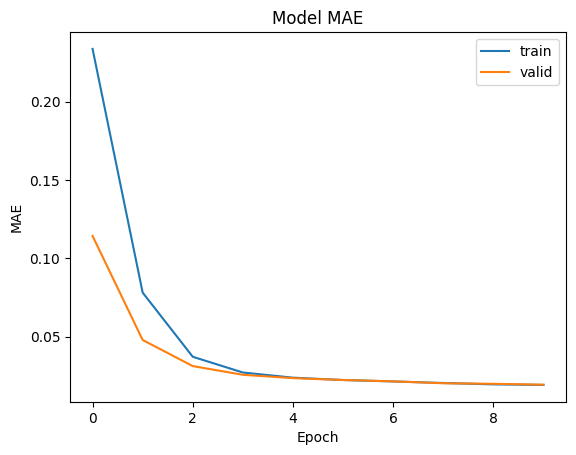

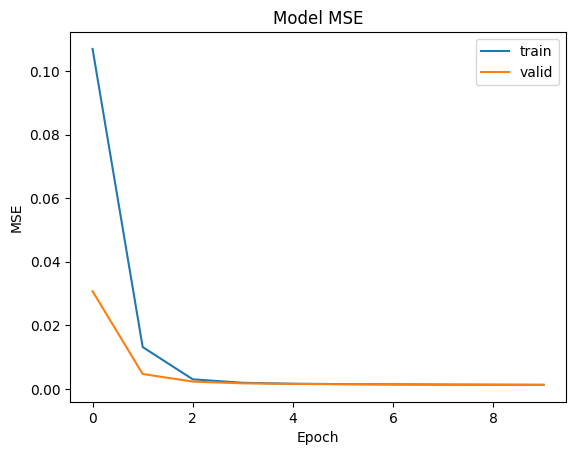

In [ ]:
create_training_history_plot(history)

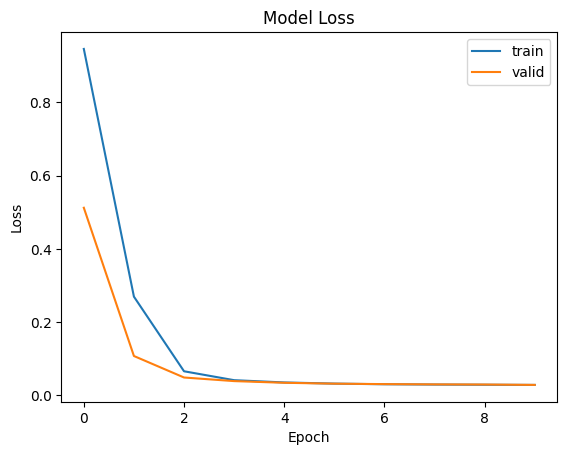

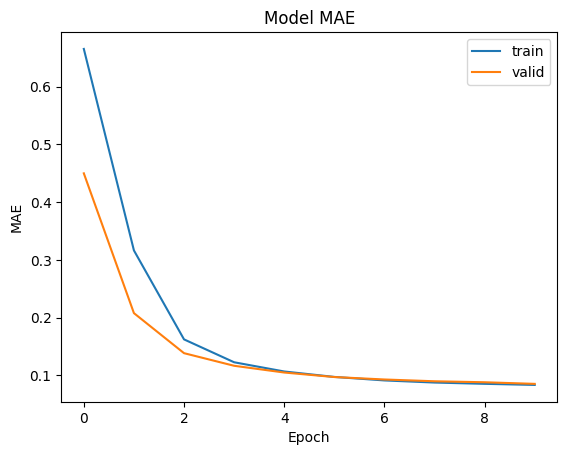

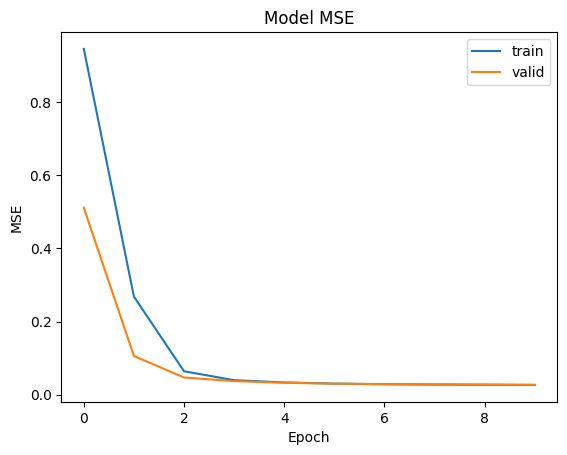

In [ ]:
create_training_history_plot(history_scaled)

In [ ]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predict the test data
y_pred = model.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.0020 - mae: 0.0196 - mse: 0.0013
Loss: 0.0019614326301962137
Mean Absolute Error: 0.01934034936130047
Mean Squared Error: 0.0013277260586619377
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
Mean absolute error: 0.01934034540686097
Mean squared error: 0.0013277256027225677
Mean relative error: 0.5554438820982476


In [ ]:
# Evaluate the model (scaled)
loss, mae, mse = model_scaled.evaluate(X_test_scaled, y_test_scaled)
print(f"Loss: {loss}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predict the test data (scaled)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Print full regression report (scaled)
print_full_regression_report(y_test_scaled, y_pred_scaled)

388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.0264 - mae: 0.0818 - mse: 0.0248
Loss: 0.02796996757388115
Mean Absolute Error: 0.0830698311328888
Mean Squared Error: 0.02633833885192871
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
Mean absolute error: 0.08306980823120166
Mean squared error: 0.02633833986059988
Mean relative error: 0.41840585968943056


In [ ]:
import tensorflow as tf

# Define the regularizer
reg = tf.keras.regularizers.l2(0.0001)

# Define the model
model2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='normal', kernel_regularizer=reg),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer='normal', kernel_regularizer=reg),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer='normal', kernel_regularizer=reg),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer='normal', kernel_regularizer=reg),
        tf.keras.layers.Dense(1, activation='linear', kernel_initializer='normal', kernel_regularizer=reg)
    ]
)
model2_scaled = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_initializer='normal', kernel_regularizer=reg),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer='normal', kernel_regularizer=reg),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer='normal', kernel_regularizer=reg),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer='normal', kernel_regularizer=reg),
        tf.keras.layers.Dense(1, activation='linear', kernel_initializer='normal', kernel_regularizer=reg)
    ]
)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam()
optimizer_scaled = tf.keras.optimizers.Adam()

# Define the loss function
loss_function = tf.keras.losses.MeanAbsoluteError()
loss_function_scaled = tf.keras.losses.MeanAbsoluteError()

# Compile the model
model2.compile(loss=loss_function, optimizer=optimizer, metrics=['mae', 'mse'])
model2_scaled.compile(loss=loss_function_scaled, optimizer=optimizer_scaled, metrics=['mae', 'mse'])

# Print the model summary
model2.summary()
model2_scaled.summary()

c:\Users\Fral0\Desktop\Workbench\progetto-piccialli\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,593 (744.50 KB)

 Trainable params: 190,593 (744.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,593 (744.50 KB)

 Trainable params: 190,593 (744.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=1024, verbose=1)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2510 - mae: 0.2067 - mse: 0.0926 - val_loss: 0.0695 - val_mae: 0.0344 - val_mse: 0.0034
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0583 - mae: 0.0253 - mse: 0.0021 - val_loss: 0.0445 - val_mae: 0.0171 - val_mse: 0.0012
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mae: 0.0156 - mse: 0.0011 - val_loss: 0.0369 - val_mae: 0.0142 - val_mse: 0.0010
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mae: 0.0135 - mse: 0.0010 - val_loss: 0.0330 - val_mae: 0.0133 - val_mse: 9.7306e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - mae: 0.0130 - mse: 0.0011 - val_loss: 0.0309 - val_mae: 0.0135 - val_mse: 9.5662e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - mae: 0.0122 - mse: 8.7885e-04 - val_loss: 0.0281 - val_mae: 0.0125 - val_mse: 8.8961e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mae: 0.0125 - mse: 9.

In [ ]:
history2_scaled = model2_scaled.fit(X_train_scaled, y_train_scaled, validation_data=(X_valid_scaled, y_valid_scaled), epochs=100, batch_size=1024, verbose=1)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5202 - mae: 0.4737 - mse: 0.8355 - val_loss: 0.1932 - val_mae: 0.1491 - val_mse: 0.1229
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1453 - mae: 0.1018 - mse: 0.0537 - val_loss: 0.1115 - val_mae: 0.0700 - val_mse: 0.0215
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1042 - mae: 0.0634 - mse: 0.0212 - val_loss: 0.1009 - val_mae: 0.0618 - val_mse: 0.0201
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0955 - mae: 0.0569 - mse: 0.0198 - val_loss: 0.0905 - val_mae: 0.0533 - val_mse: 0.0184
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0887 - mae: 0.0520 - mse: 0.0185 - val_loss: 0.0880 - val_mae: 0.0525 - val_mse: 0.0183
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0873 - mae: 0.0522 - mse: 0.0191 - val_loss: 0.0862 - val_mae: 0.0522 - val_mse: 0.0180
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0832 - mae: 0.0496 - mse: 0.0159 - val_loss:

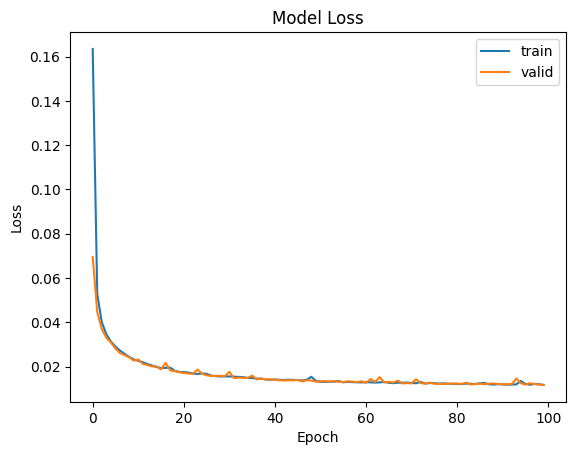

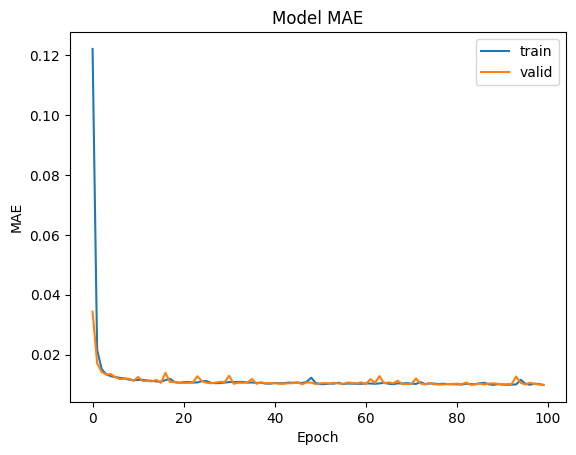

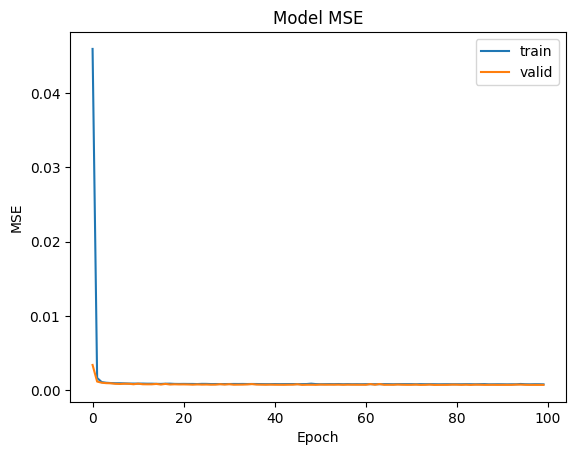

In [ ]:
create_training_history_plot(history2)

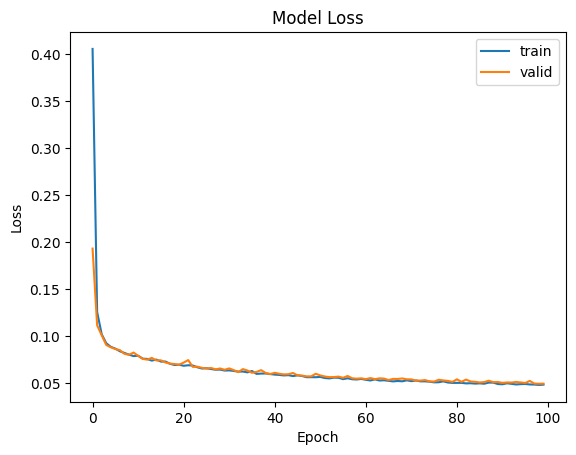

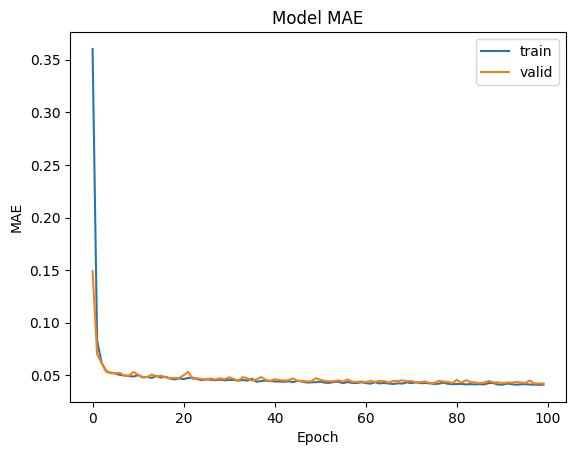

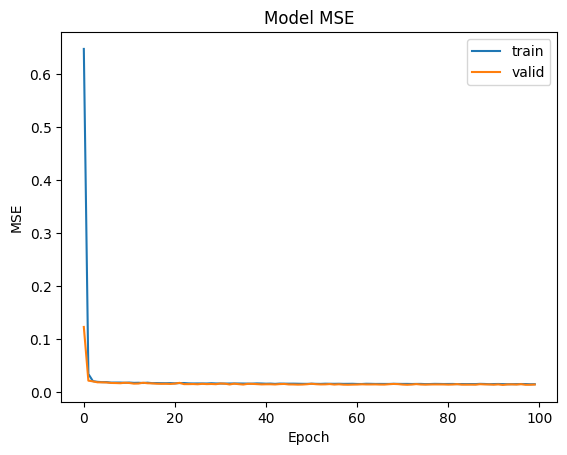

In [ ]:
create_training_history_plot(history2_scaled)

In [ ]:
# Evaluate the model
loss, mae, mse = model2.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predict the test data
y_pred = model2.predict(X_test)

# Print full regression report
print_full_regression_report(y_test, y_pred)

388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.0119 - mae: 0.0101 - mse: 8.2962e-04
Loss: 0.011925148777663708
Mean Absolute Error: 0.010077591985464096
Mean Squared Error: 0.0008642364991828799
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
Mean absolute error: 0.010077594685289256
Mean squared error: 0.0008642362450714966
Mean relative error: 0.5562224903765336


In [ ]:
# Evaluate the model (scaled)
loss, mae, mse = model2_scaled.evaluate(X_test_scaled, y_test_scaled)
print(f"Loss: {loss}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predict the test data (scaled)
y_pred_scaled = model2_scaled.predict(X_test_scaled)

# Print full regression report (scaled)
print_full_regression_report(y_test_scaled, y_pred_scaled)

388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.0501 - mae: 0.0432 - mse: 0.0159
Loss: 0.050215814262628555
Mean Absolute Error: 0.043299056589603424
Mean Squared Error: 0.016676759347319603
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Mean absolute error: 0.043299028659810467
Mean squared error: 0.016676759565278577
Mean relative error: 0.16590937117399754


# Classification from Regression

In [ ]:
# Take classification data from pickle files
X_train = pickle.load(open('X_train_classification.pkl', 'rb'))
X_test = pickle.load(open('X_test_classification.pkl', 'rb'))
y_train = pickle.load(open('y_train_classification.pkl', 'rb'))
y_test = pickle.load(open('y_test_classification.pkl', 'rb'))

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class RegressionClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, regressor_model, intervals, classes_map = None):
        self.model = regressor_model
        self.intervals = intervals

        if classes_map is None:
            self.classes_map = {i: i for i in range(len(intervals) - 1)}
        else:
            self.classes_map = classes_map

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.model.predict(X)
        y_pred_class = np.zeros_like(y_pred)
        for i in range(len(self.intervals) - 1):
            # Note: mask is a vector of booleans
            mask = (y_pred >= self.intervals[i]) & (y_pred < self.intervals[i + 1])
            y_pred_class[mask] = self.classes_map[i]
        return y_pred_class

Accuracy: 0.9921799419542083
Confusion matrix:


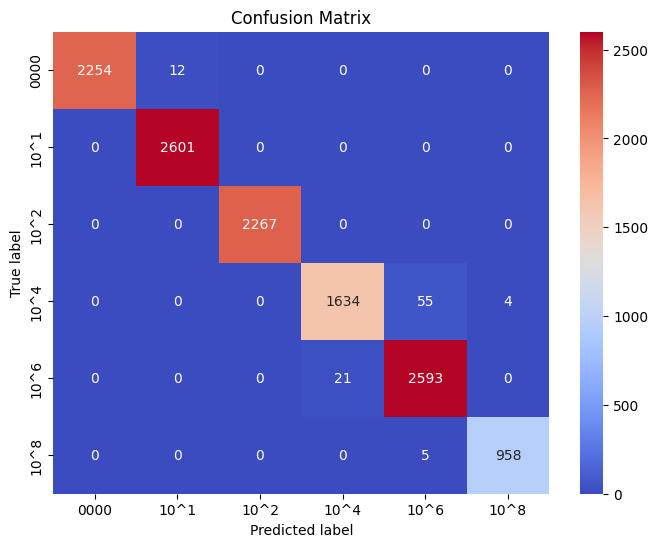

Classification Report:
              precision    recall  f1-score   support

        0000       1.00      0.99      1.00      2266
        10^1       1.00      1.00      1.00      2601
        10^2       1.00      1.00      1.00      2267
        10^4       0.99      0.97      0.98      1693
        10^6       0.98      0.99      0.98      2614
        10^8       1.00      0.99      1.00       963

    accuracy                           0.99     12404
   macro avg       0.99      0.99      0.99     12404
weighted avg       0.99      0.99      0.99     12404



In [ ]:
# Import the data
import pickle
from sklearn.neighbors import KNeighborsRegressor

X_classification = pickle.load(open('X_classification.pkl', 'rb'))
X_train_classification = pickle.load(open('X_train_classification.pkl', 'rb'))
X_test_classification = pickle.load(open('X_test_classification.pkl', 'rb'))
y_classification = pickle.load(open('y_classification.pkl', 'rb'))
y_train_classification = pickle.load(open('y_train_classification.pkl', 'rb'))
y_test_classification = pickle.load(open('y_test_classification.pkl', 'rb'))

X_regression = pickle.load(open('X_regression.pkl', 'rb'))
X_train_regression = pickle.load(open('X_train_regression.pkl', 'rb'))
X_test_regression = pickle.load(open('X_test_regression.pkl', 'rb'))
y_regression = pickle.load(open('y_classification.pkl', 'rb'))
y_train_regression = pickle.load(open('y_train_regression.pkl', 'rb'))
y_test_regression = pickle.load(open('y_test_regression.pkl', 'rb'))

# Train the model
regressor_model = KNeighborsRegressor(n_neighbors=7)

classifier_intervals = [0, 0.225, 0.28, 0.35, 0.42, 0.75, 1.5]
classifier_model = RegressionClassifier(regressor_model, classifier_intervals)

classifier_model.fit(X_train_regression, y_train_regression)

# Predict the classes
y_pred_classification = classifier_model.predict(X_test_classification)

# Print full classification report
print_full_classification_report(y_test_classification, y_pred_classification, target_names=CLASSES_SHORT)
